# Results Tracking Tool (for 5-min timeframe)

In [413]:
import numpy as np, pandas as pd, scipy.io as sp, matplotlib.pyplot as plt, matplotlib.style as style
import matplotlib.backends.backend_pdf
style.use('fivethirtyeight')
from statistics import mean
from pathlib import Path
import csv

%matplotlib inline
%config InlineBackend.figure_format ='retina'

### The code block below reads a given init file and obtains the relevant test number. If you don't have an init file yet, comment this block and input your .mat filename in the code block right after.

In [414]:
# with open('dummy_init.csv',encoding='utf-8-sig') as input_file:
#     readCSV = csv.reader(input_file, delimiter=',')   
#     for row in readCSV:                            # Takes the integer from the csv and forms the relevant filename.
#         if int(row[0],10) < 10:
#             sim_number = "simData_00"  + row[0] 
#         if int(row[0],10) >= 10 and int(row[0],10) < 100:
#             sim_number = "simData_" + "0" + row[0]
#         if int(row[0],10) >= 100:
#             sim_number = "simData_" + row[0]
            
# test_number = row[0]
# sim_pdf = matplotlib.backends.backend_pdf.PdfPages(sim_number + "_TEST" ".pdf") # Creating PDF here
# mat_file = sp.loadmat(sim_number + ".mat") # loading the relevant .mat file

In [465]:
sim_number = "sim1_1_way1_nolim" # CHANGE SIM NAME HERE TO MATCH YOUR .MAT FILE NAME!

sim_pdf = matplotlib.backends.backend_pdf.PdfPages(sim_number + ".pdf") # Creating PDF here
test_number = sim_number[3:]

mat_file = sp.loadmat(sim_number + ".mat") # loading the relevant .mat file

In [417]:
sim_volmag_vals = mat_file['vmag_new']
sim_volang_vals = mat_file['vang_new']
sim_realpwr_vals = mat_file['pnew']
sim_reactivepwr_vals = mat_file['qnew']
sim_volmag_ref = mat_file['vmag_ref']
sim_volang_ref = mat_file['vang_ref']

In [418]:
sim_vol_A_list, sim_vol_B_list, sim_vol_C_list = ([] for i in range(3))
sim_ang_A_list, sim_ang_B_list, sim_ang_C_list = ([] for i in range(3))
sim_realpwr_A_list, sim_realpwr_B_list, sim_realpwr_C_list = ([] for i in range(3))
sim_reactivepwr_A_list, sim_reactivepwr_B_list, sim_reactivepwr_C_list = ([] for i in range(3))
sim_vol_A_reflist, sim_vol_B_reflist, sim_vol_C_reflist = ([] for i in range(3))
sim_ang_A_reflist, sim_ang_B_reflist, sim_ang_C_reflist = ([] for i in range(3))

refpoints = []


for i in range(0,sim_volmag_vals.size//3):
    sim_vol_A_list.append((sim_volmag_vals[i][0])),sim_vol_B_list.append((sim_volmag_vals[i][1])),sim_vol_C_list.append((sim_volmag_vals[i][2]))
    sim_ang_A_list.append((sim_volang_vals[i][0])),sim_ang_B_list.append((sim_volang_vals[i][1])),sim_ang_C_list.append((sim_volang_vals[i][2]))
    sim_realpwr_A_list.append((sim_realpwr_vals[i][0])),sim_realpwr_B_list.append((sim_realpwr_vals[i][1])),sim_realpwr_C_list.append((sim_realpwr_vals[i][2]))
    sim_reactivepwr_A_list.append((sim_reactivepwr_vals[i][0])),sim_reactivepwr_B_list.append((sim_reactivepwr_vals[i][1])),sim_reactivepwr_C_list.append((sim_reactivepwr_vals[i][2]))

        
        
for i in range(0,sim_volmag_ref.size//4):
    sim_vol_A_reflist.append((sim_volmag_ref[i][1])),sim_vol_B_reflist.append((sim_volmag_ref[i][2])),sim_vol_C_reflist.append((sim_volmag_ref[i][3]))
    refpoints.append((sim_volmag_ref[i][0]))
    sim_ang_A_reflist.append((sim_volang_ref[i][1])),sim_ang_B_reflist.append((sim_volang_ref[i][2])),sim_ang_C_reflist.append((sim_volang_ref[i][3]))
    


### Important: The code below modifies the input data with a timestamp of 0.1 seconds to convert to secondwise data. Comment it out if your data is secondwise!

In [ ]:
sim_vol_A_list = sim_vol_A_list[0::10]
sim_vol_B_list = sim_vol_B_list[0::10]
sim_vol_C_list = sim_vol_C_list[0::10]
sim_ang_A_list = sim_ang_A_list[0::10]
sim_ang_B_list = sim_ang_B_list[0::10]
sim_ang_C_list = sim_ang_C_list[0::10]
sim_realpwr_A_list = sim_realpwr_A_list[0::10]
sim_realpwr_B_list = sim_realpwr_B_list[0::10]
sim_realpwr_C_list = sim_realpwr_C_list[0::10]
sim_reactivepwr_A_list = sim_reactivepwr_A_list[0::10]
sim_reactivepwr_B_list = sim_reactivepwr_B_list[0::10]
sim_reactivepwr_C_list = sim_reactivepwr_C_list[0::10]

# The time values below were chosen arbitrarily. Please change the index values in the code blocks below to adjust for the timeframe you are looking at.

## Voltage Magnitude Snapshot from 4:00 to 4:01 PM

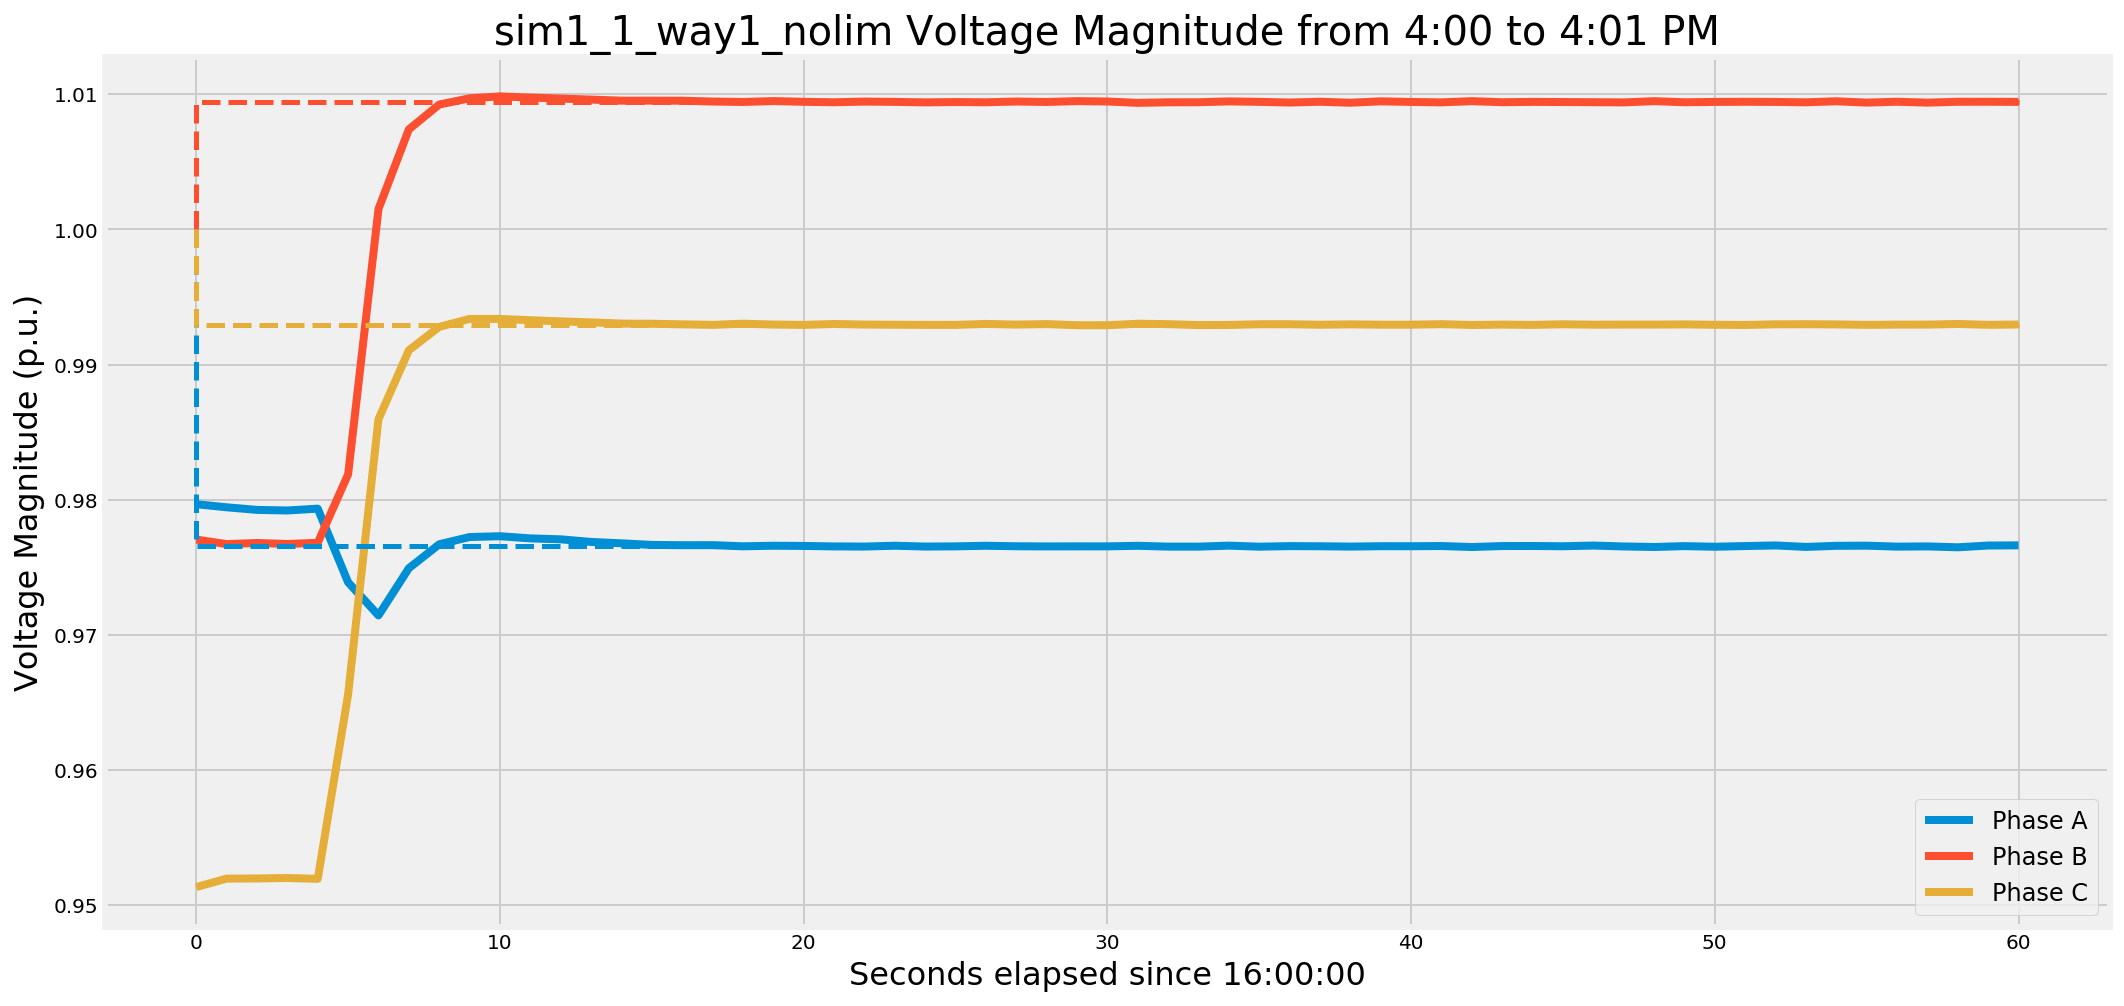

In [420]:
#graph V_mag over time

plt.plot(sim_vol_A_list[:61])
plt.plot(sim_vol_B_list[:61])
plt.plot(sim_vol_C_list[:61])
plt.step(refpoints[:3], sim_vol_A_reflist[:3],color = 'C0',linestyle = '--',linewidth = 2.5)
plt.step(refpoints[:3], sim_vol_B_reflist[:3],color = 'C1',linestyle = '--',linewidth = 2.5)
plt.step(refpoints[:3], sim_vol_C_reflist[:3],color = 'C2',linestyle = '--',linewidth = 2.5)

plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:00:00',fontsize = 16)
plt.title(sim_number + ' Voltage Magnitude from 4:00 to 4:01 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})


sim_pdf.savefig()
#plt.close()
plt.show()

## Voltage Magnitudes from 4:03 to 4:04 PM

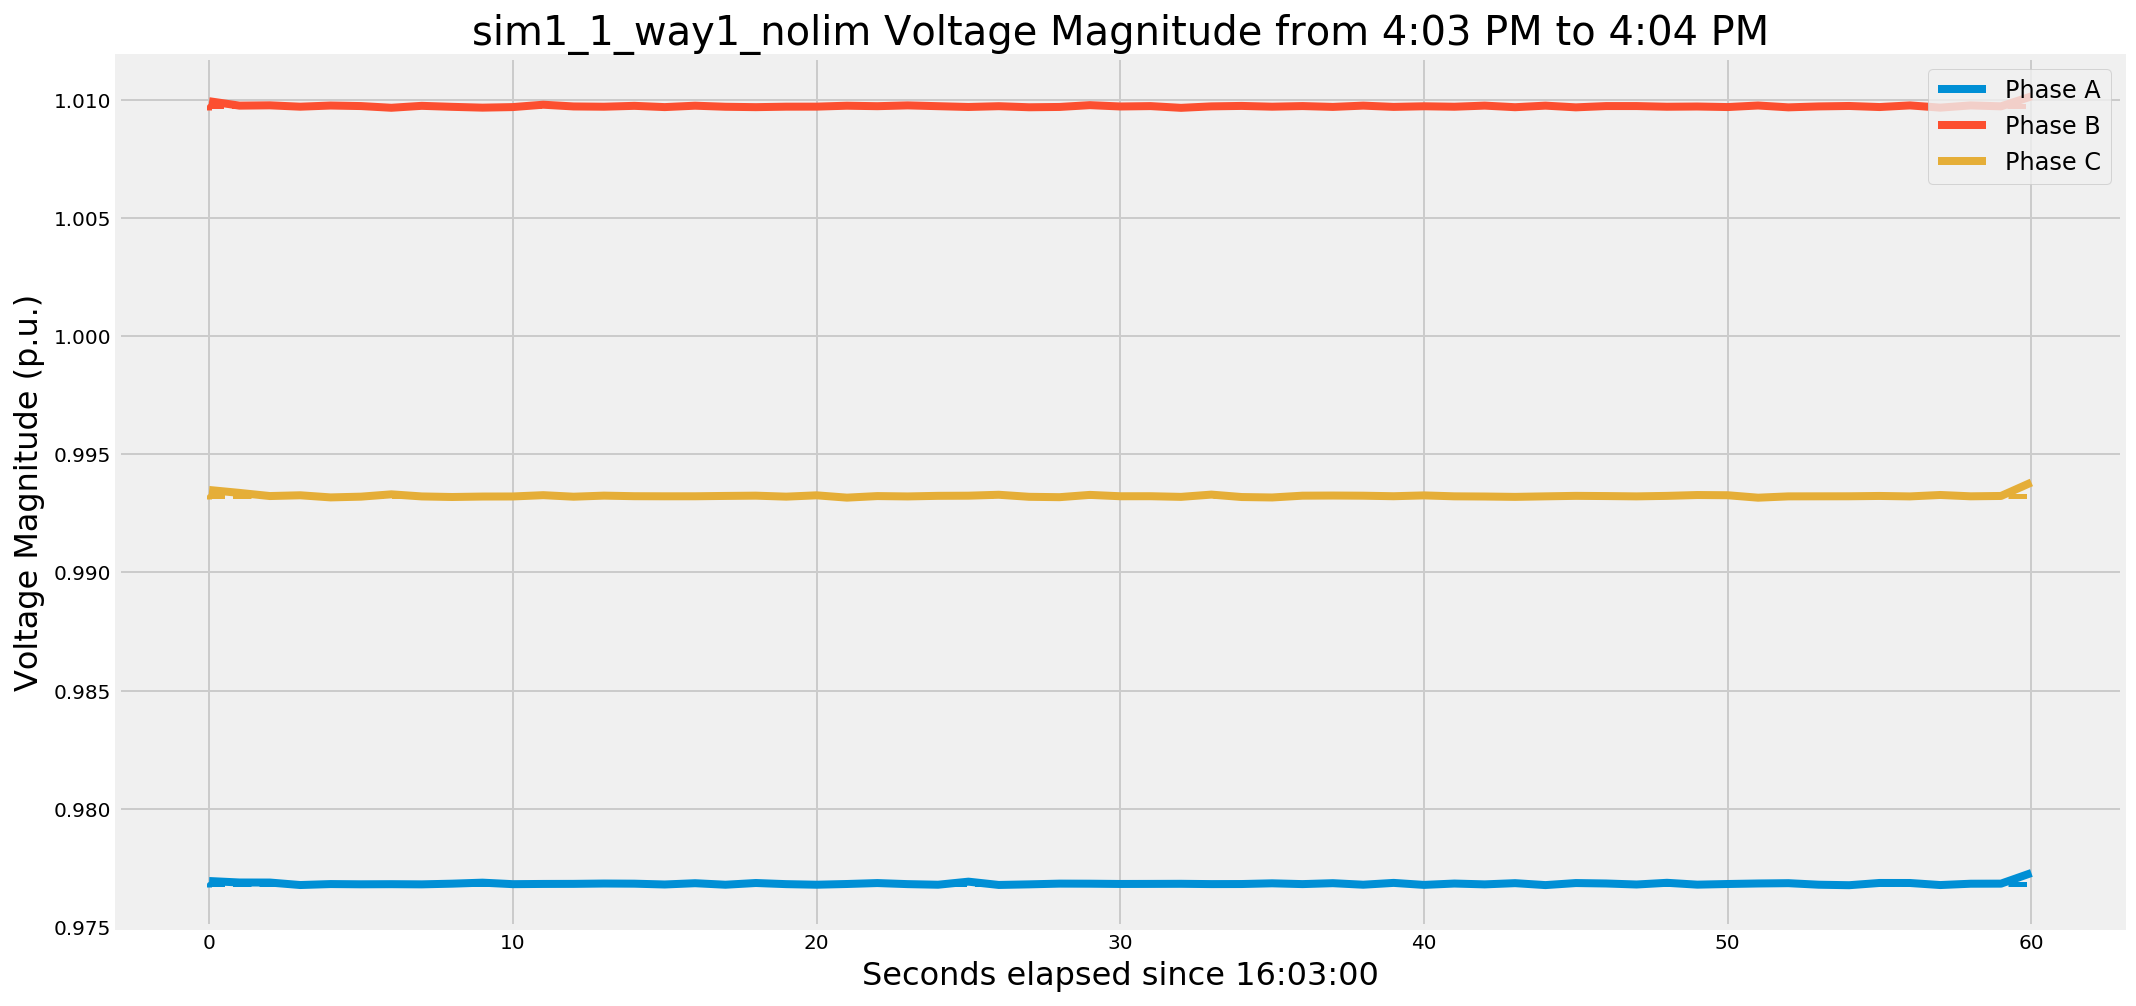

In [421]:
#graph V_mag over time
plt.plot(sim_vol_A_list[181:242]) #Filler values
plt.plot(sim_vol_B_list[181:242])
plt.plot(sim_vol_C_list[181:242])

plt.step(refpoints[:3], sim_vol_A_reflist[6:9],color = 'C0',linestyle = '--',linewidth = 2.5)
plt.step(refpoints[:3], sim_vol_B_reflist[6:9],color = 'C1',linestyle = '--',linewidth = 2.5)
plt.step(refpoints[:3], sim_vol_C_reflist[6:9],color = 'C2',linestyle = '--',linewidth = 2.5)

plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:03:00',fontsize = 16)
plt.title(sim_number + ' Voltage Magnitude from 4:03 PM to 4:04 PM', fontsize = 20)
#plt.ylim(bottom = 0.90,top=1.08)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})

#plt.savefig('Vmag_12PM.png', dpi=100)
sim_pdf.savefig()
#plt.close()
plt.show()

## Voltage Magnitudes from 4:04 to 4:05 PM

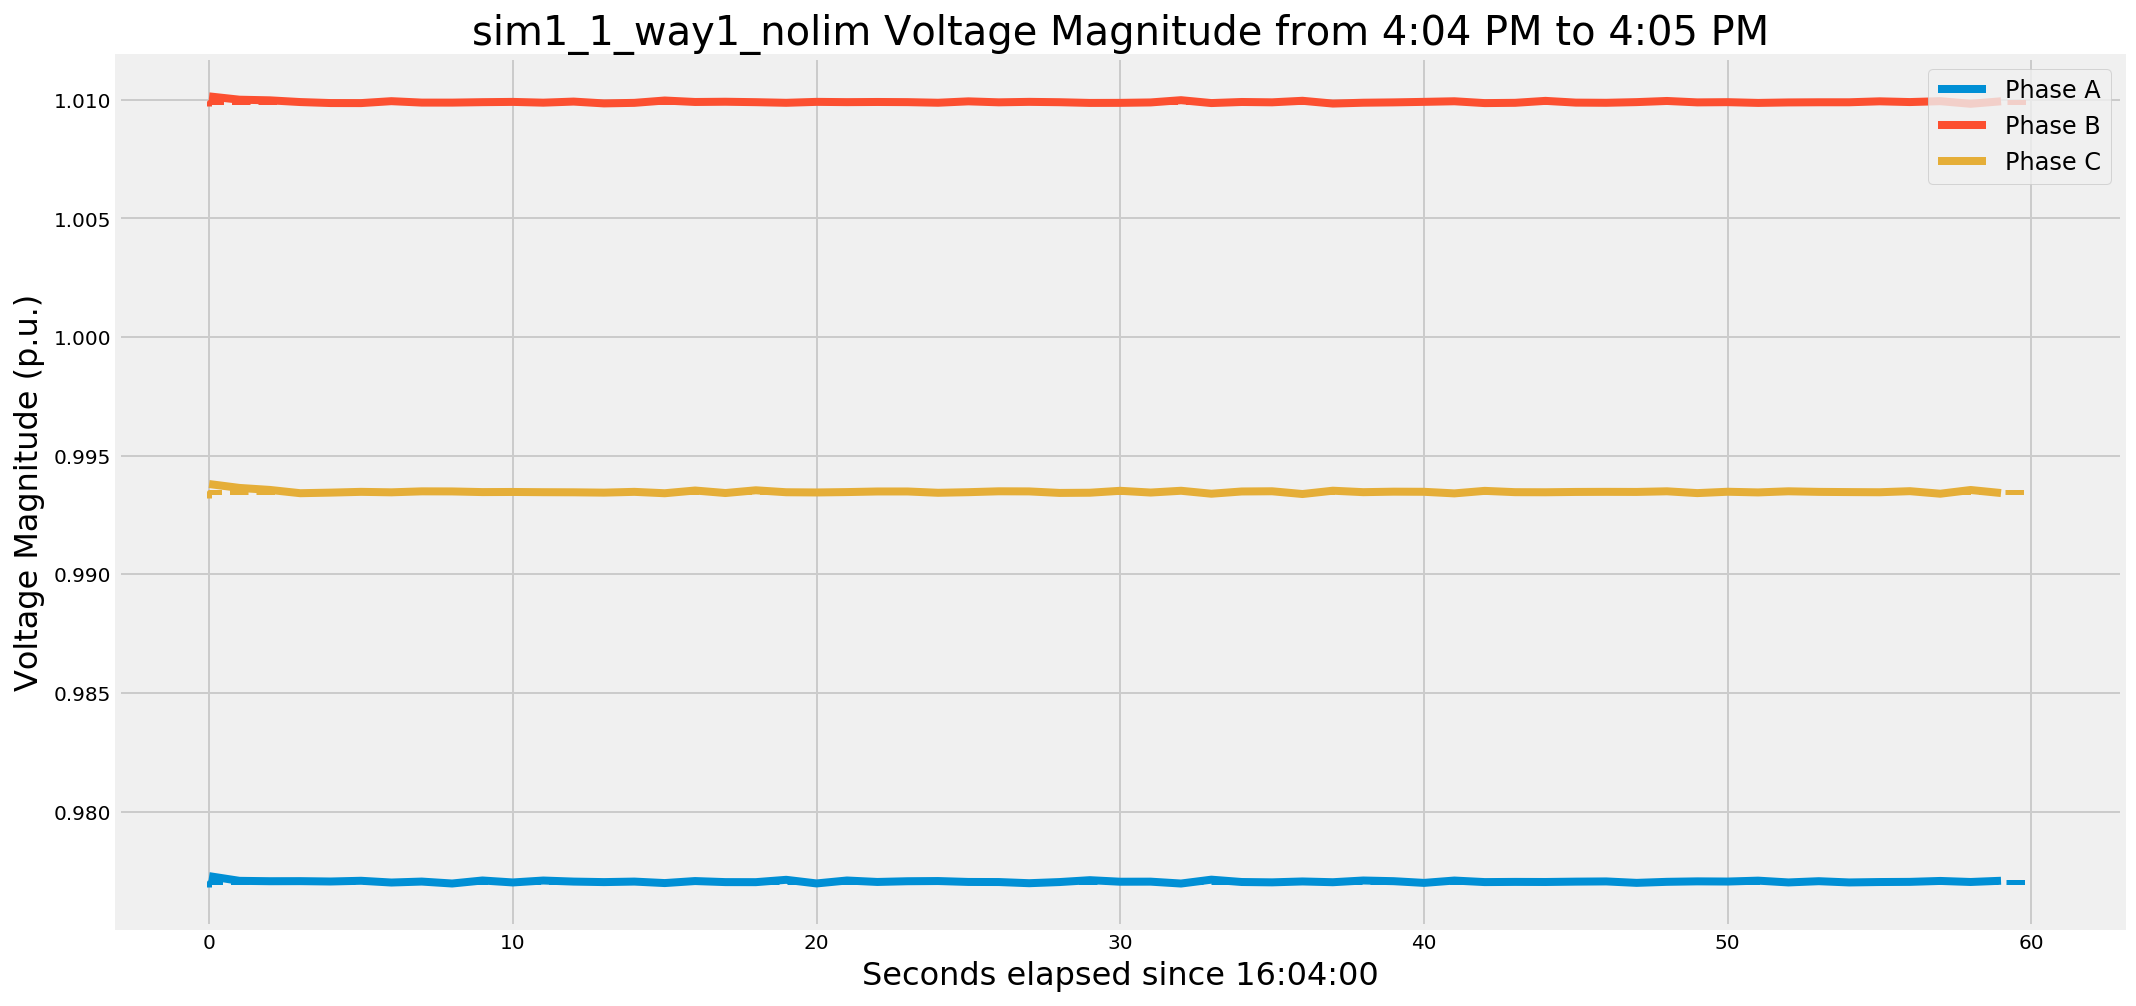

In [422]:
#graph V_mag over time
plt.plot(sim_vol_A_list[241:302]) #Filler values
plt.plot(sim_vol_B_list[241:302])
plt.plot(sim_vol_C_list[241:302])

plt.step(refpoints[:3], sim_vol_A_reflist[8:],color = 'C0',linestyle = '--',linewidth = 2.5)
plt.step(refpoints[:3], sim_vol_B_reflist[8:],color = 'C1',linestyle = '--',linewidth = 2.5)
plt.step(refpoints[:3], sim_vol_C_reflist[8:],color = 'C2',linestyle = '--',linewidth = 2.5)


plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:04:00',fontsize = 16)
plt.title(sim_number + ' Voltage Magnitude from 4:04 PM to 4:05 PM', fontsize = 20)
#plt.ylim(bottom = 0.92,top=1.08)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})

sim_pdf.savefig()
#plt.close()
plt.show()

## Voltage Angles from 4:00 PM to 4:01 PM

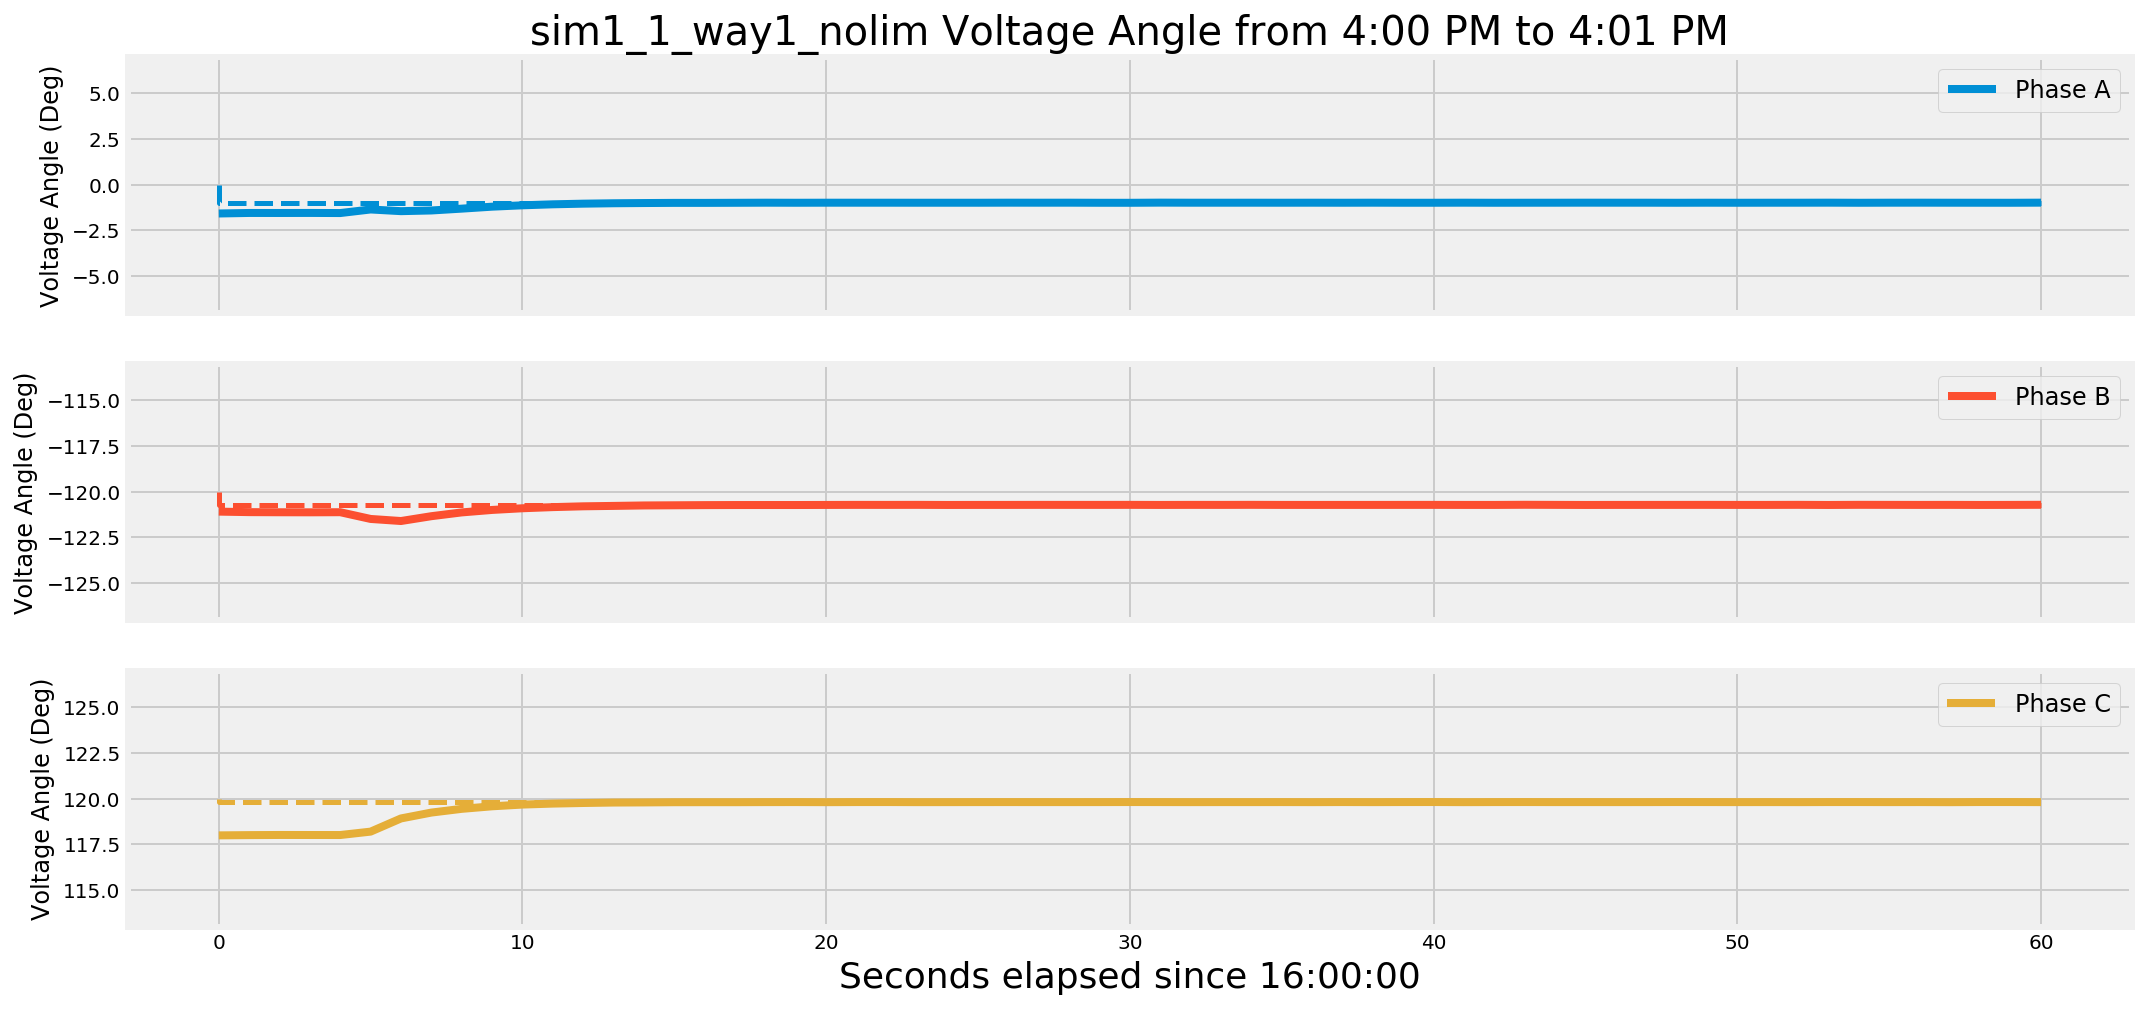

In [423]:
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

ax.plot(sim_ang_A_list[:61])
ax.step(refpoints[:3], sim_ang_A_reflist[:3],color = 'C0',linestyle = '--',linewidth = 2.5)

ax2.plot(sim_ang_B_list[:61], color = 'C1')
ax2.step(refpoints[:3], sim_ang_B_reflist[:3],color = 'C1',linestyle = '--',linewidth = 2.5)

ax3.plot(sim_ang_C_list[:61], color = 'C2')
ax3.step(refpoints[:3], sim_ang_C_reflist[:3],color = 'C2',linestyle = '--',linewidth = 2.5)

ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


ax.set_title(sim_number + ' Voltage Angle from 4:00 PM to 4:01 PM',fontsize = 20)
ax3.set_xlabel('Seconds elapsed since 16:00:00',fontsize = 18)
ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

sim_pdf.savefig()
#plt.close()
plt.show()

## Voltage Angles from 4:03 PM to 4:04 PM

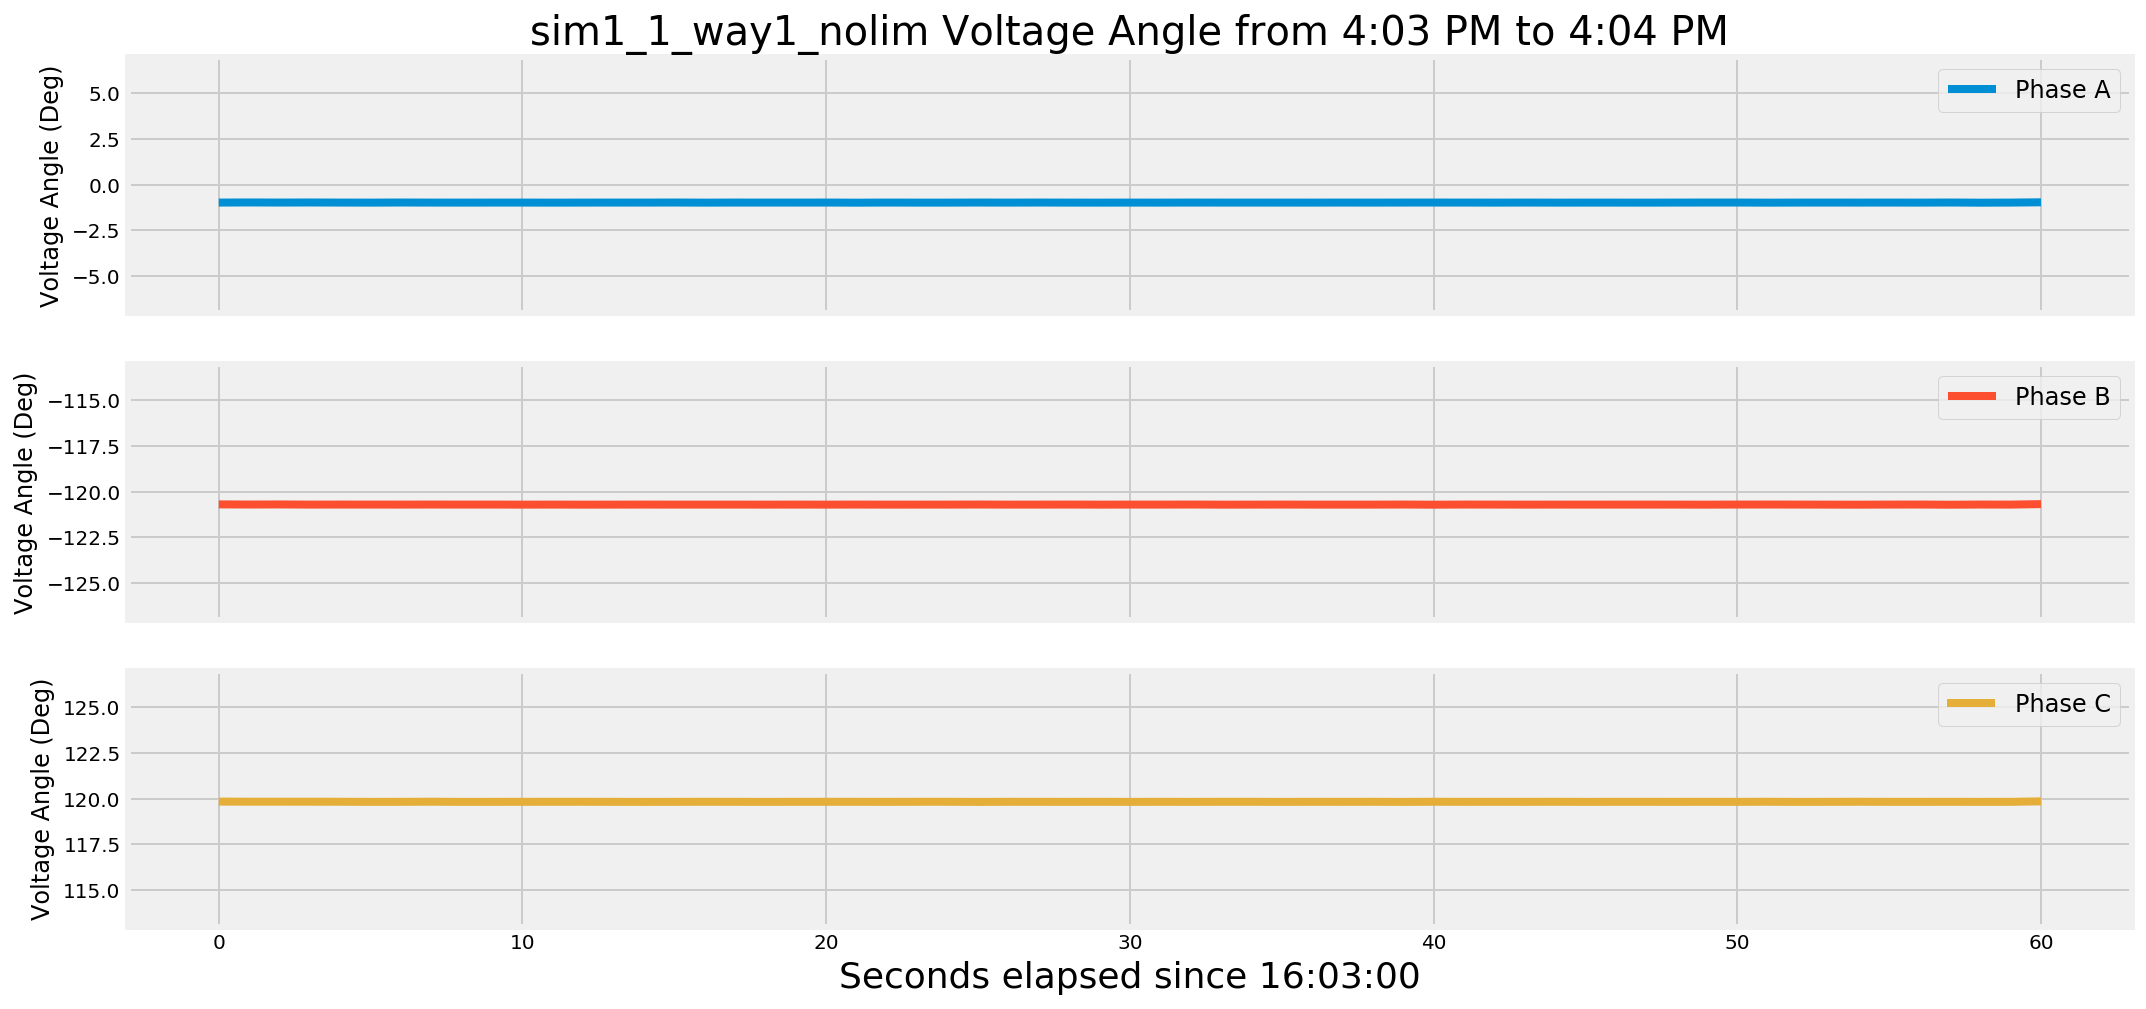

In [424]:
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

ax.plot(sim_ang_A_list[181:242])
ax.step(refpoints[:3], sim_ang_A_reflist[6:9],color = 'C0',linestyle = '--',linewidth = 2.5)

ax2.plot(sim_ang_B_list[181:242], color = 'C1')
ax2.step(refpoints[:3], sim_ang_B_reflist[6:9],color = 'C1',linestyle = '--',linewidth = 2.5)

ax3.plot(sim_ang_C_list[181:242], color = 'C2')
ax3.step(refpoints[:3], sim_ang_C_reflist[6:9],color = 'C2',linestyle = '--',linewidth = 2.5)

ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


ax.set_title(sim_number + ' Voltage Angle from 4:03 PM to 4:04 PM',fontsize = 20)
ax3.set_xlabel('Seconds elapsed since 16:03:00',fontsize = 18)
ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

sim_pdf.savefig()
#plt.close()
plt.show()

## Voltage Angles from 4:04 PM to 4:05 PM

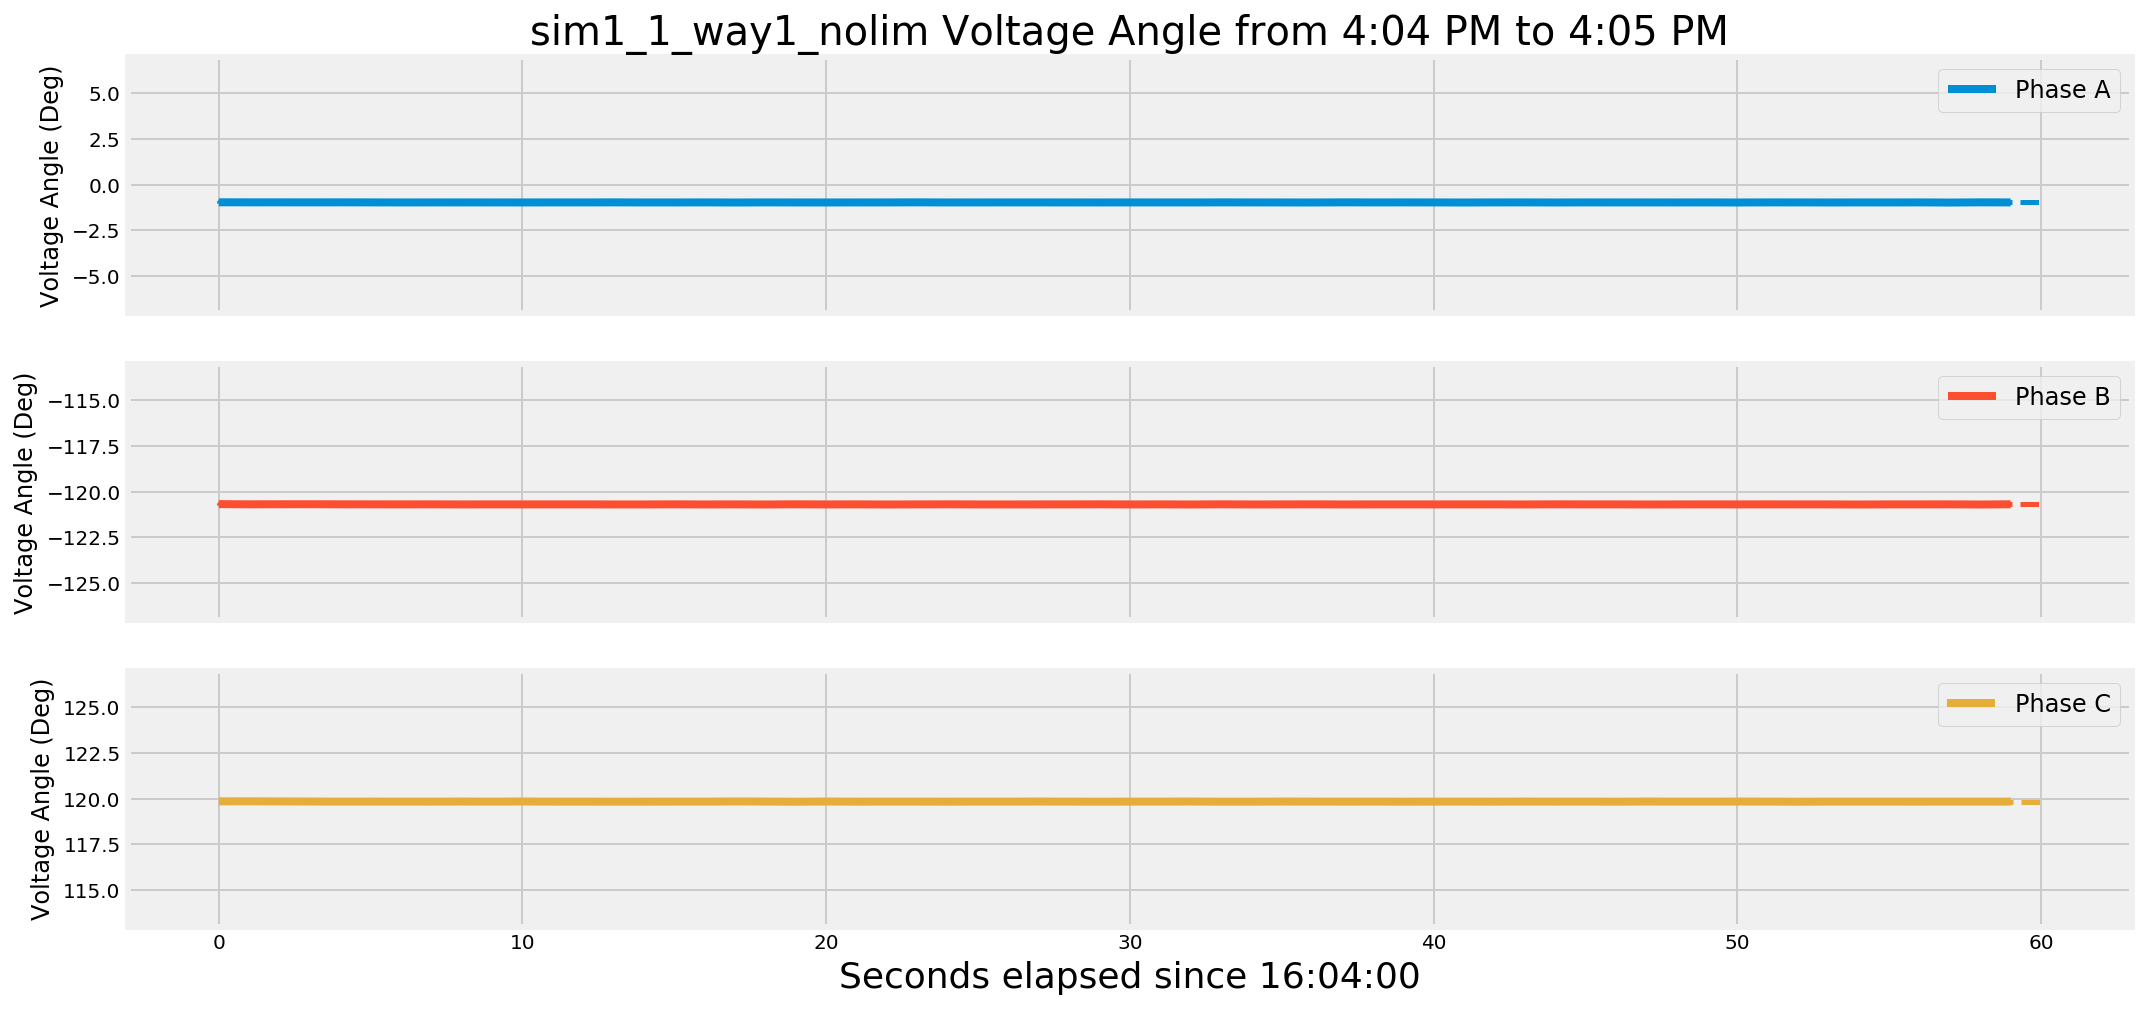

In [425]:
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

ax.plot(sim_ang_A_list[241:302])
ax.step(refpoints[:3], sim_ang_A_reflist[8:],color = 'C0',linestyle = '--',linewidth = 2.5)

ax2.plot(sim_ang_B_list[241:302], color = 'C1')
ax2.step(refpoints[:3], sim_ang_B_reflist[8:],color = 'C1',linestyle = '--',linewidth = 2.5)

ax3.plot(sim_ang_C_list[241:302], color = 'C2')
ax3.step(refpoints[:3], sim_ang_C_reflist[8:],color = 'C2',linestyle = '--',linewidth = 2.5)

ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


ax.set_title(sim_number + ' Voltage Angle from 4:04 PM to 4:05 PM',fontsize = 20)
ax3.set_xlabel('Seconds elapsed since 16:04:00',fontsize = 18)
ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

sim_pdf.savefig()
#plt.close()
plt.show()

## Real Power from 4:00 PM to 4:01 PM

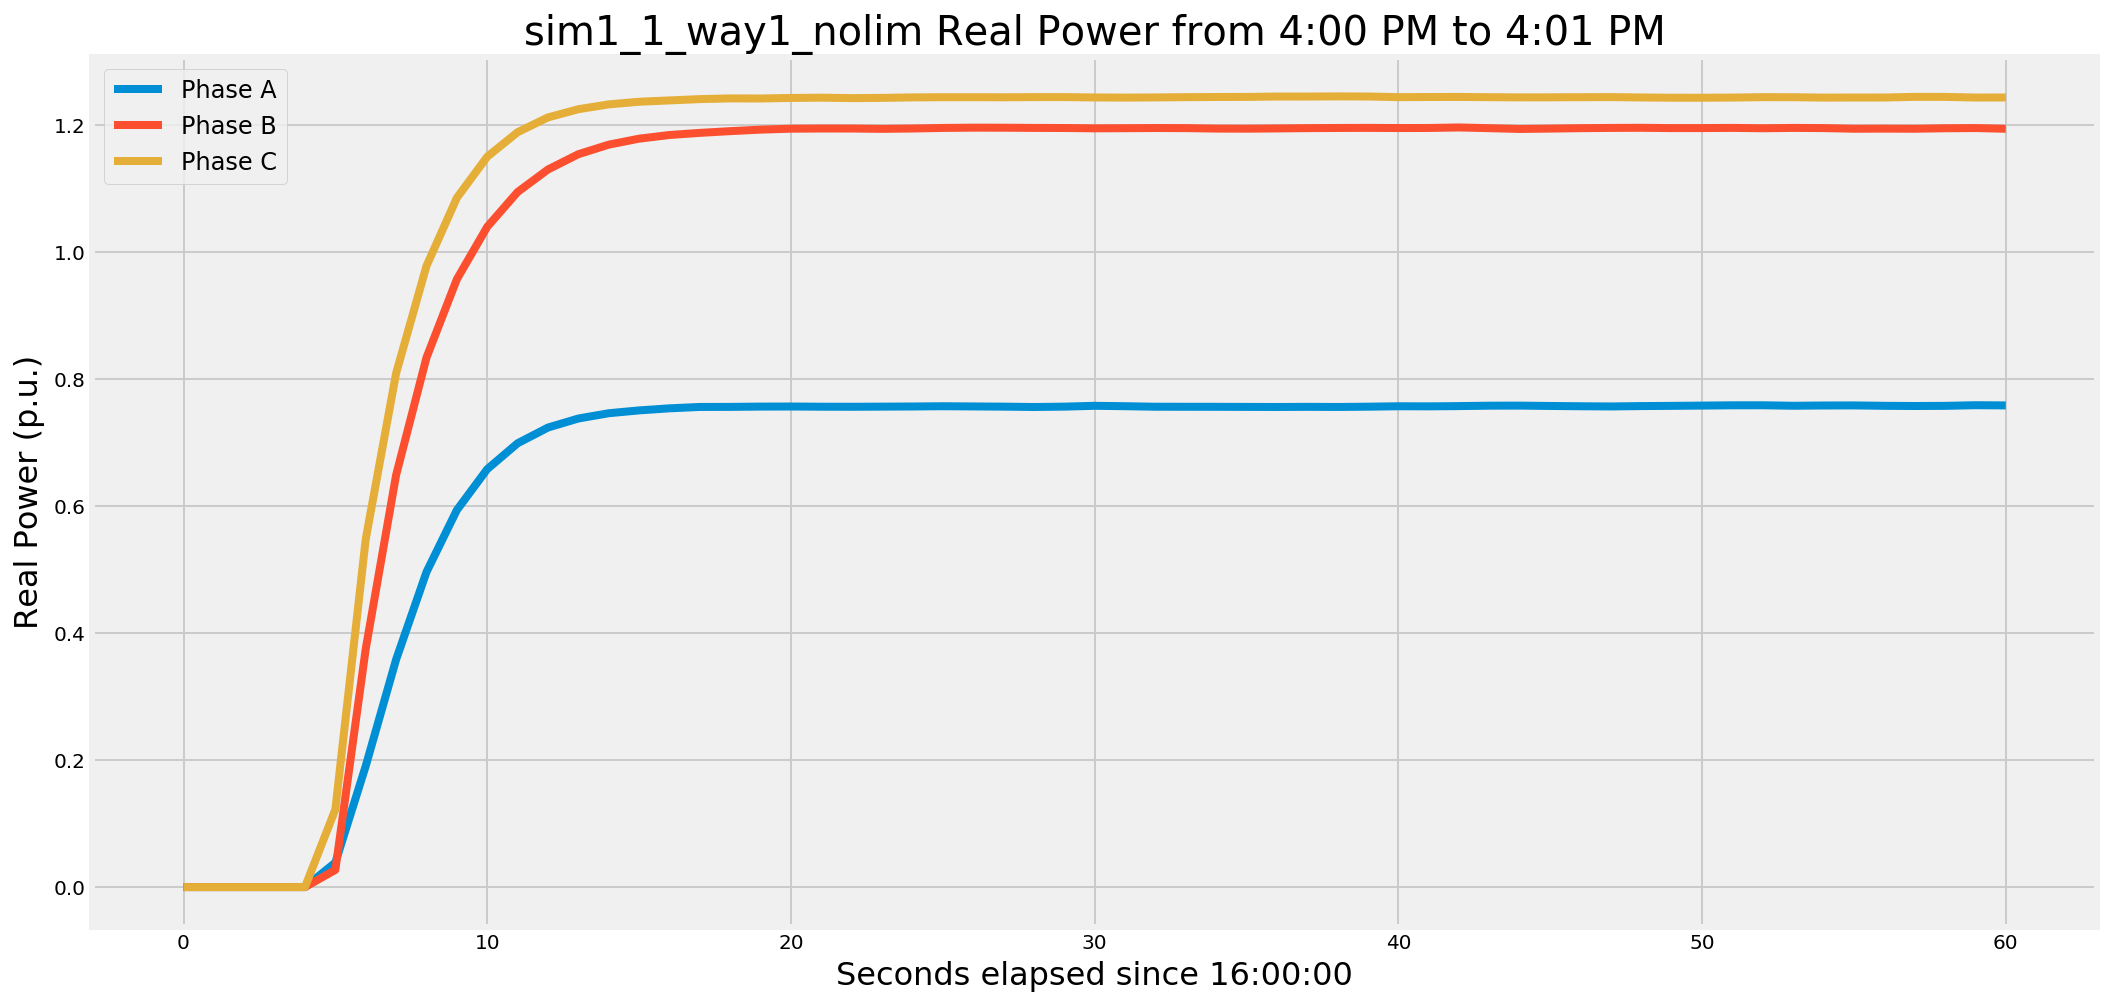

In [426]:
#graph Power over time
plt.plot(sim_realpwr_A_list[:61])
plt.plot(sim_realpwr_B_list[:61])
plt.plot(sim_realpwr_C_list[:61])
plt.ylabel('Real Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:00:00',fontsize = 16)
plt.title(sim_number + ' Real Power from 4:00 PM to 4:01 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) 

#plt.savefig('RealPower_9AM.png', dpi=100)
sim_pdf.savefig()
#plt.close()
plt.show()

## Real Power from 4:03 PM to 4:04 PM

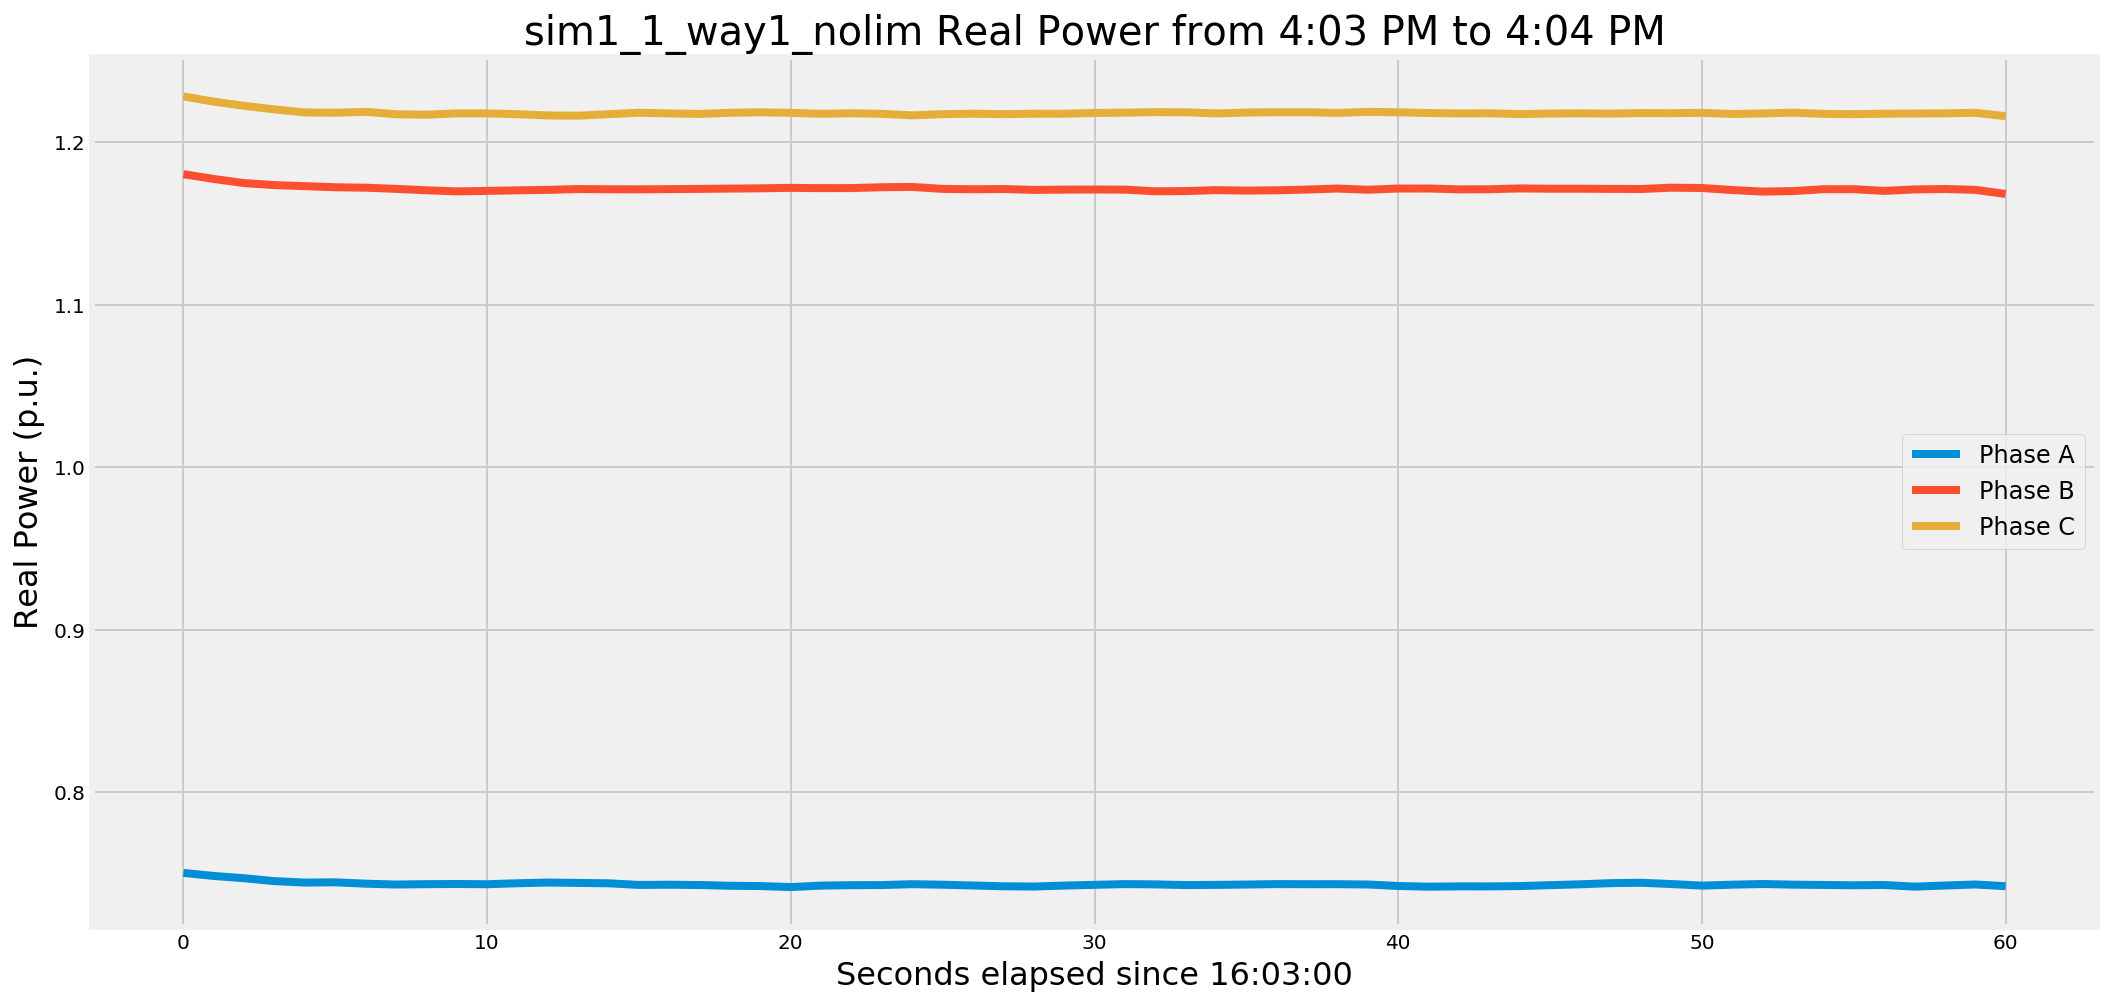

In [427]:
plt.plot(sim_realpwr_A_list[181:242])
plt.plot(sim_realpwr_B_list[181:242])
plt.plot(sim_realpwr_C_list[181:242])
plt.ylabel('Real Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:03:00',fontsize = 16)
plt.title(sim_number + ' Real Power from 4:03 PM to 4:04 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

#plt.savefig('RealPower_12PM.png', dpi=100)
sim_pdf.savefig()
#plt.close()
plt.show()

## Real Power from 4:04 PM to 4:05 PM

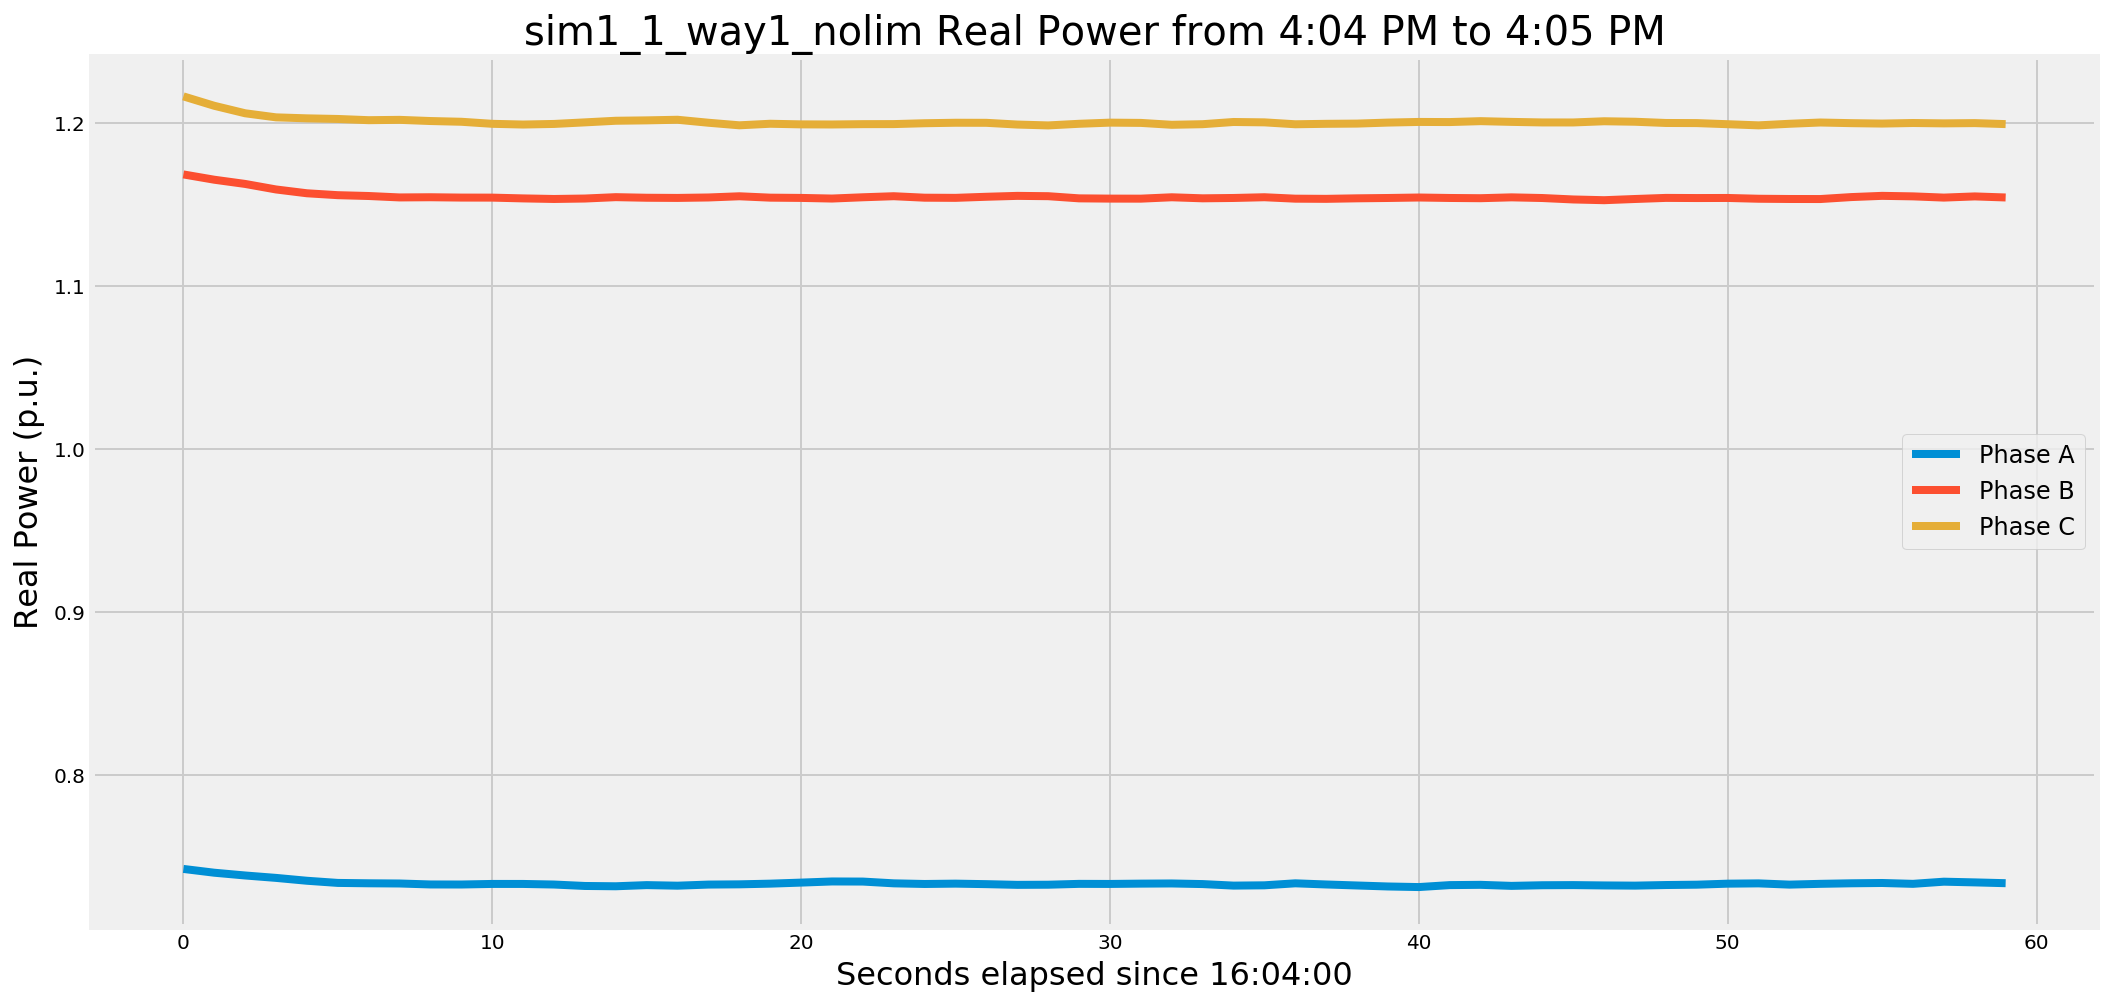

In [428]:
plt.plot(sim_realpwr_A_list[241:302])
plt.plot(sim_realpwr_B_list[241:302])
plt.plot(sim_realpwr_C_list[241:302])
plt.ylabel('Real Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:04:00',fontsize = 16)
plt.title(sim_number + ' Real Power from 4:04 PM to 4:05 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

#plt.savefig('RealPower_5PM.png', dpi=100)
sim_pdf.savefig()
#plt.close()
plt.show()

## Reactive Power from 4:00 PM to 4:01 PM

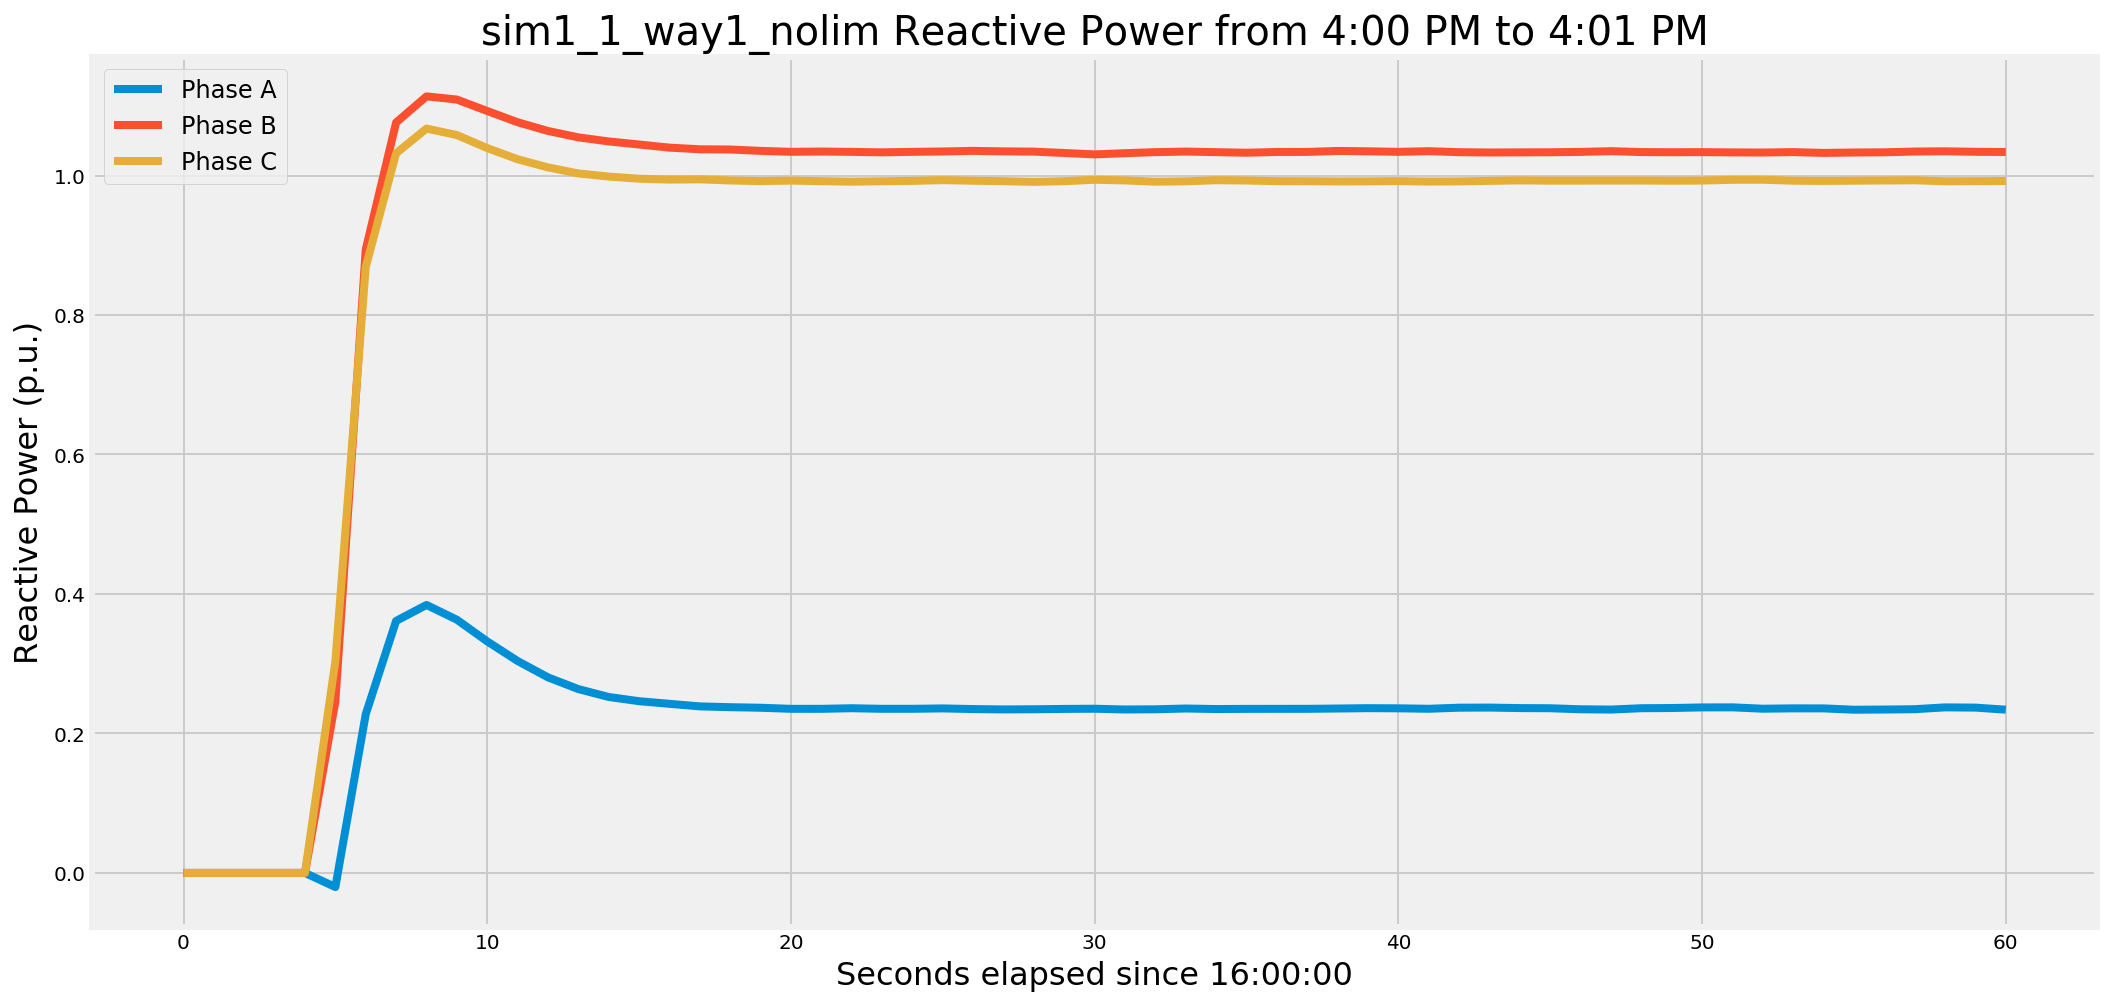

In [429]:
plt.plot(sim_reactivepwr_A_list[:61])
plt.plot(sim_reactivepwr_B_list[:61])
plt.plot(sim_reactivepwr_C_list[:61])
plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:00:00',fontsize = 16)
plt.title(sim_number + ' Reactive Power from 4:00 PM to 4:01 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION


sim_pdf.savefig()
#plt.close()
plt.show()

## Reactive Power from 4:03 PM to 4:04 PM

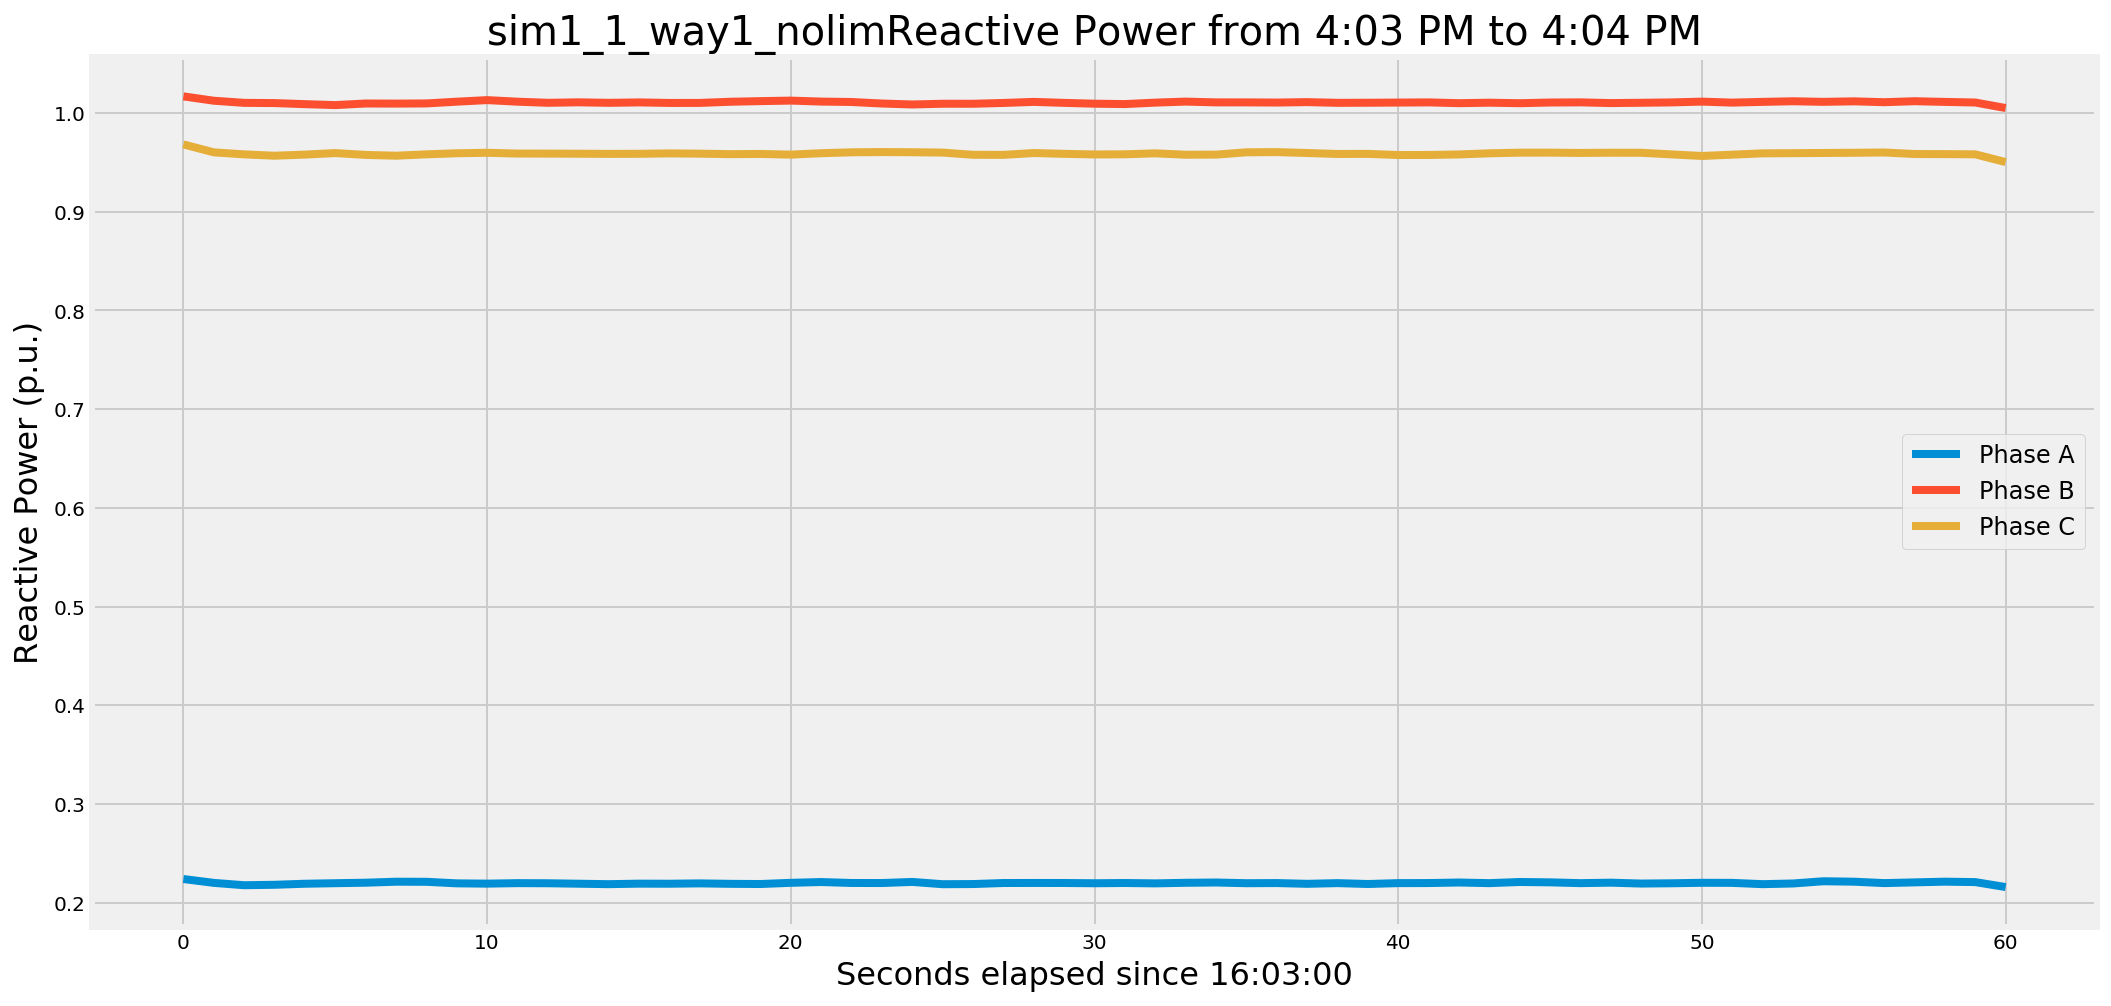

In [430]:
plt.plot(sim_reactivepwr_A_list[181:242])
plt.plot(sim_reactivepwr_B_list[181:242])
plt.plot(sim_reactivepwr_C_list[181:242])
plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:03:00',fontsize = 16)
plt.title(sim_number + 'Reactive Power from 4:03 PM to 4:04 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION


#plt.savefig('ReactivePower_12PM.png', dpi=100)
sim_pdf.savefig()
#plt.close()
plt.show()

## Reactive Power from 4:04 PM to 4:05 PM

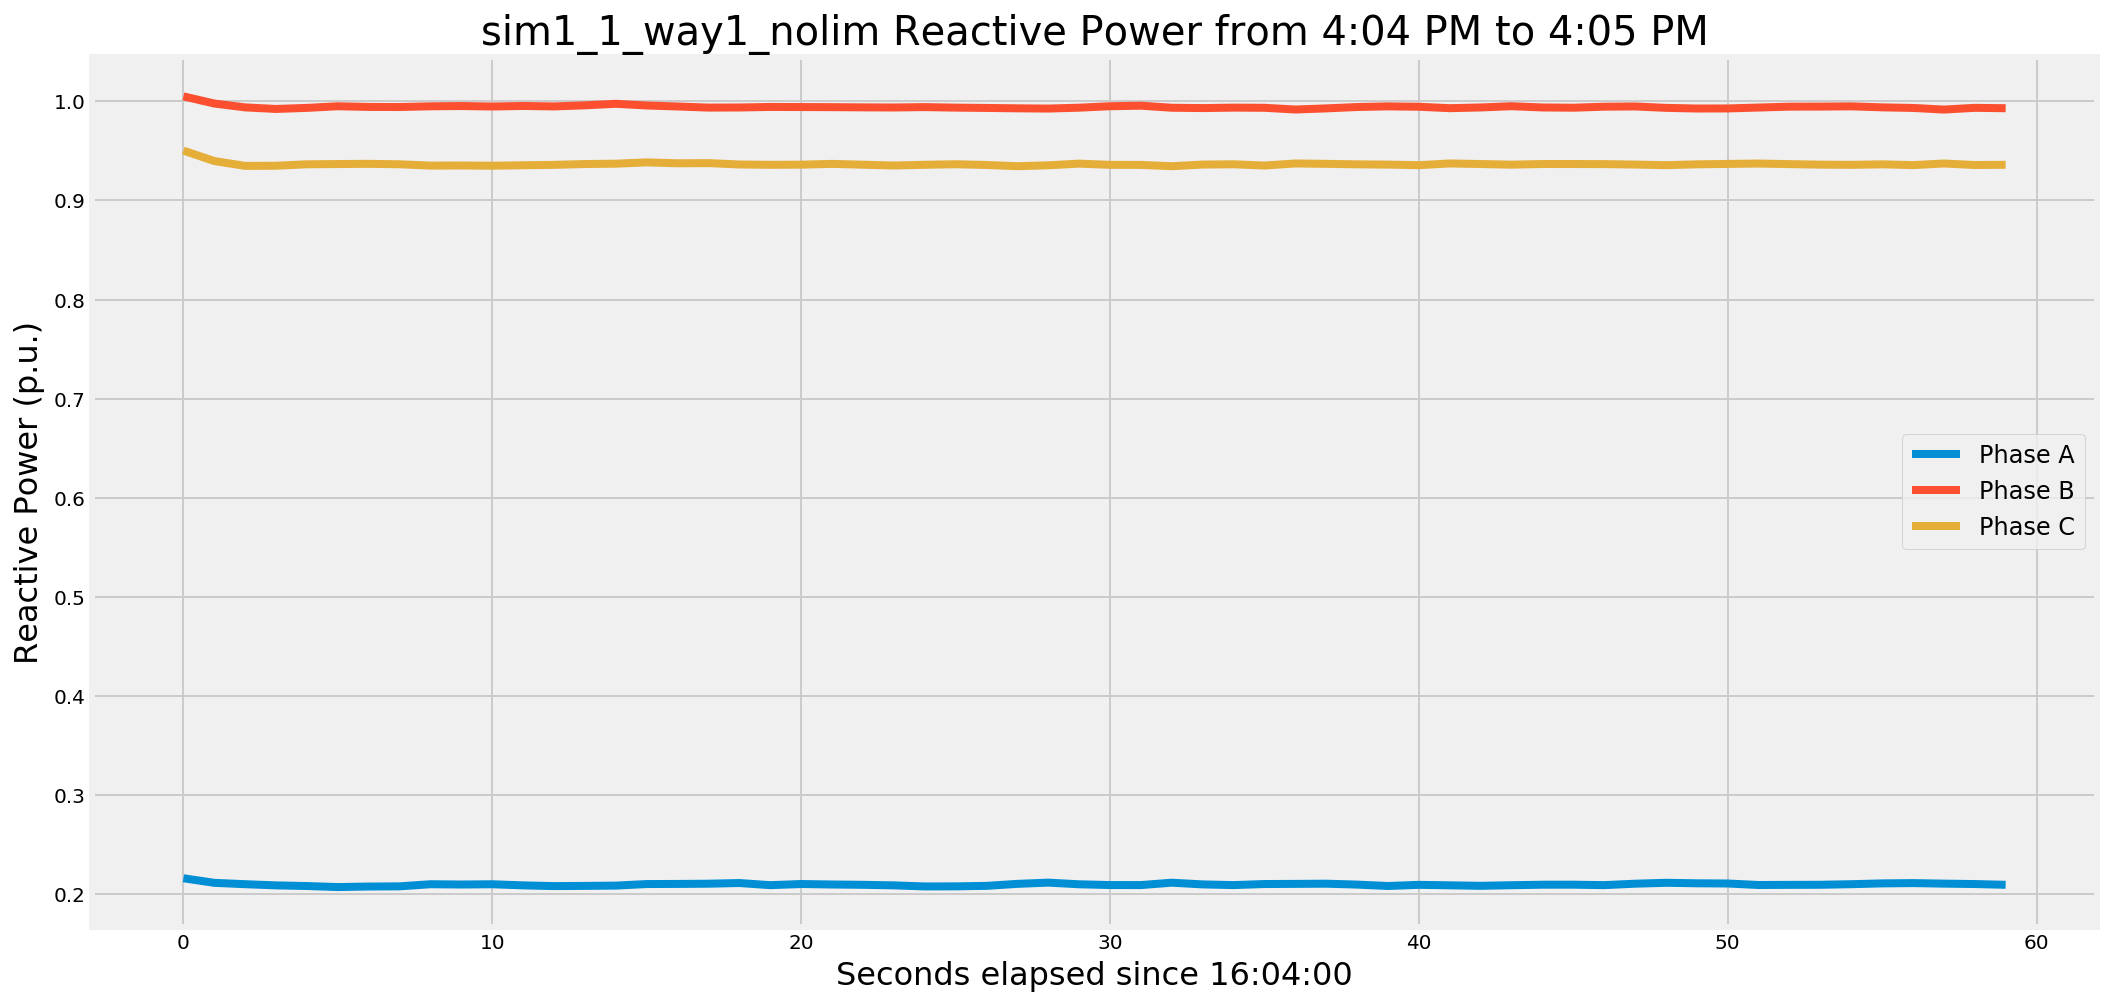

In [464]:
plt.plot(sim_reactivepwr_A_list[241:])
plt.plot(sim_reactivepwr_B_list[241:])
plt.plot(sim_reactivepwr_C_list[241:])

plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 16:04:00',fontsize = 16)
plt.title(sim_number + ' Reactive Power from 4:04 PM to 4:05 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

sim_pdf.savefig()
#plt.close()
plt.show()

### The function below returns the number of times that V_mag went out of bounds (< 0.95 p.u. or > 1.05 p.u.) 

In [432]:
def V_out_of_bounds(vol_A_list,vol_B_list,vol_C_list):
    voltages_oob = []
    corr_times = []
    for i in range(len(vol_A_list)):
        if vol_A_list[i] < 0.95 or vol_A_list[i] > 1.05:
            voltages_oob.append(vol_A_list[i])
            corr_times.append(i)
        if vol_B_list[i] < 0.95 or vol_B_list[i] > 1.05:
            voltages_oob.append(vol_B_list[i])
            corr_times.append(i)
        if vol_C_list[i] < 0.95 or vol_C_list[i] > 1.05:
            voltages_oob.append(vol_C_list[i]) 
            corr_times.append(i)
    #print("Voltage went out of bounds",len(voltages_oob),"times.","The corresponding timestamps are:",'\n',corr_times)
    
    return len(corr_times)

#### Storing values for the sim:

In [433]:
sim_Voob = V_out_of_bounds(sim_vol_A_list,sim_vol_B_list,sim_vol_C_list)


In [434]:
#function that returns largest deviation from target for Vmag.

def max_vmag_deviation(vol_A_list,vol_B_list,vol_C_list,ref_A_list,ref_B_list,ref_C_list):
    for i in range(0,len(vol_A_list) // 60):
        vmag_maxdev_A = max(abs(x - ref_A_list[i]) for x in vol_A_list)
        vmag_maxdev_B = max(abs(x - ref_B_list[i]) for x in vol_B_list)
        vmag_maxdev_C = max(abs(x - ref_C_list[i]) for x in vol_C_list)
    
    return max(vmag_maxdev_A,vmag_maxdev_B,vmag_maxdev_C)

In [435]:
sim_max_vmag_dev = max_vmag_deviation(sim_vol_A_list,sim_vol_B_list,sim_vol_C_list,sim_vol_A_reflist,sim_vol_B_reflist,sim_vol_C_reflist)

In [436]:
#function that returns largest deviation from target for Vang.

def max_vang_deviation(ang_A_list,ang_B_list,ang_C_list,ref_A_list,ref_B_list,ref_C_list):
    for i in range(0,len(ang_A_list) // 60):
        vang_maxdev_A = max(abs(x - ref_A_list[i]) for x in ang_A_list)
        vang_maxdev_B = max(abs(x - ref_B_list[i]) for x in ang_B_list)
        vang_maxdev_C = max(abs(x - ref_C_list[i]) for x in ang_C_list)
    
    return max(vang_maxdev_A,vang_maxdev_B,vang_maxdev_C)

In [437]:
sim_max_vang_dev = max_vang_deviation(sim_ang_A_list,sim_ang_B_list,sim_ang_C_list,sim_ang_A_reflist,sim_ang_B_reflist,sim_ang_C_reflist)

In [438]:
#Function to convert index to timestamp (corresponding to seconds after 4 PM)
def realtime(x): # say x = 299. should return 4:03:01 PM
    if (x//60) < 10:
        if (x%60) < 10:
            return '16:' + '0' + str(x//60) + ':' + '0' + str(x%60)
        return '16:' + '0' + str(x//60) + ':' + str(x%60)


In [439]:
def max_realpower(realpwr_A_list,realpwr_B_list,realpwr_C_list):
    A_max = max(realpwr_A_list)
    B_max = max(realpwr_B_list)
    C_max = max(realpwr_C_list)
    maxpower = max(A_max, B_max, C_max)
    
    if maxpower in realpwr_A_list:
        timestamp = realtime(realpwr_A_list.index(maxpower))
    elif maxpower in realpwr_B_list:
        timestamp = realtime(realpwr_B_list.index(maxpower))
    else:
        timestamp = realtime(realpwr_C_list.index(maxpower))
    maxpower_list = [maxpower,timestamp]
    
    return maxpower_list

In [440]:
sim_maxP = max_realpower(sim_realpwr_A_list,sim_realpwr_B_list,sim_realpwr_C_list)

In [441]:
def max_reactivepower(reactivepwr_A_list,reactivepwr_B_list,reactivepwr_C_list):
    A_max = max(reactivepwr_A_list)
    B_max = max(reactivepwr_B_list)
    C_max = max(reactivepwr_C_list)
    maxpower = max(A_max, B_max, C_max)
    
    if maxpower in reactivepwr_A_list:
        timestamp = realtime(reactivepwr_A_list.index(maxpower))
    elif maxpower in reactivepwr_B_list:
        timestamp = realtime(reactivepwr_B_list.index(maxpower))
    else:
        timestamp = realtime(reactivepwr_C_list.index(maxpower))
    maxpower_list = [maxpower,timestamp]
    
    return maxpower_list

In [442]:
sim_maxQ = max_reactivepower(sim_reactivepwr_A_list,sim_reactivepwr_B_list,sim_reactivepwr_C_list)

In [443]:
len(sim_vol_A_list)

301

In [444]:
def vmag_overshoot(input_list, target_list):
    overshoots = []
    
    for i in range(0,len(input_list) // 60): # input_list) // 60 returns number of minutes in the sim.
        target = target_list[(2*i)]
        y_peak = (target_list[(2*i)])
        for x in range(60*i,(60*(i+1))): 
            if input_list[x] > y_peak and input_list[x] > input_list[x+1]:
                y_peak = input_list[x]
                overshoots.append((100*(y_peak-target)/target)) #OS computed as percentage
    if len(overshoots) == 0:
        overshoots = [0]*(len(input_list) // 60)
    return overshoots

#when there is an overshoot, it calculates the value. Often, there isn't an OS.

In [445]:
sim_phaseA_OS = vmag_overshoot(sim_vol_A_list,sim_vol_A_reflist)
sim_phaseB_OS = vmag_overshoot(sim_vol_B_list,sim_vol_B_reflist)
sim_phaseC_OS = vmag_overshoot(sim_vol_C_list,sim_vol_C_reflist)

sim_3phavg_OS = (mean(sim_phaseA_OS), mean(sim_phaseB_OS),mean(sim_phaseC_OS))

sim_3phmax_OS = (max(sim_phaseA_OS), max(sim_phaseB_OS),max(sim_phaseC_OS))

sim_avg_OS = mean(sim_3phavg_OS)

sim_max_OS = max(sim_3phmax_OS)

In [446]:
def test_vmag_overshoot(input_list, target_list):
    overshoots = []
    for i in range(0,len(input_list) // 5): # there's 60 minutes in this sim, so i =(0,60)
        target = target_list[i]
        y_peak =  target_list[i]
        for x in range(5*i,(5*(i+1))):
            if input_list[x]>y_peak and input_list[x] > input_list[x+1]:
                y_peak = input_list[x]
                overshoots.append(100*(y_peak-target)/target)
    return overshoots

In [447]:
testlist = [1,2,4,3,3,3,5,6,2,4]
target = [3,4]

test_vmag_overshoot(testlist,target)  # want 33.3% and 50%

[33.333333333333336, 50.0]

## Angle overshoot (120 degrees used to normalise the 3-phase overshoots)

In [448]:
def test_vang_overshoot(input_list, target_angle):
    ang_overshoots = []

    for i in range(0,len(list_X) //10): # there's 60 minutes in this sim, so i =(0,60)
        if target_angle == 0:
            y_peak = 0
            for x in range(10*i,10*(i+1) -2):
                if input_list[x] < 0:
                    continue
                if  (input_list[x]) > (y_peak) and (input_list[x]) > max((input_list[x+1]),(input_list[x+2])):
                    y_peak = input_list[x]
                    ang_overshoots.append((100*(y_peak-0)/120))
    return ang_overshoots                

In [449]:
list_X = [-0.5,-0.4,0,0,1,2,1,1,0,0,1,1.1,1.2,1.3,1.4,1.3,1,0.5,0.4,0.2]
answer = test_vang_overshoot(list_X, 0)
answer

[1.6666666666666667, 1.1666666666666667]

In [450]:
def vang_overshoot(input_list, target_angle):
    ang_overshoots = []
    
    for i in range(0,len(input_list) // 60): # there's 5 minutes in this sim, so i =(0,5)
        if target_angle == 0:
            y_peak = 0
            for x in range(60*i,(60*(i+1))-3):
                if input_list[x] < 0:
                    continue
                if  (input_list[x]) > (y_peak) and (input_list[x]) > max((input_list[x+1]),(input_list[x+2]),(input_list[x+3])):
                    y_peak = input_list[x]
                    ang_overshoots.append((100*(y_peak-0)/120)) #OS computed as percentage 
              
        if target_angle == -120:
            y_peak = -120
            for x in range(60*i,(60*(i+1))-3):
                if input_list[x] > 0:
                    continue
                if  abs(input_list[x]) > abs(y_peak) and abs(input_list[x]) > max(abs(input_list[x+1]),abs(input_list[x+2]),abs(input_list[x+3])):
                    y_peak = input_list[x]
                    ang_overshoots.append((100*(-120-y_peak)/120)) 
                
        if target_angle == 120:
            y_peak = 120
            for x in range(60*i,(60*(i+1))-3):
                if input_list[x] < 0:
                    continue
                if  abs(input_list[x]) > abs(y_peak) and abs(input_list[x]) > max(abs(input_list[x+1]),abs(input_list[x+2]),abs(input_list[x+3])):
                    y_peak = input_list[x]
                    ang_overshoots.append((100*(y_peak-120)/120))        
    if len(ang_overshoots) == 0:
        ang_overshoots = [0]*(len(input_list) // 60)

    
    return ang_overshoots

In [451]:
sim_phaseA_ang_OS = vang_overshoot(sim_ang_A_list,0)
sim_phaseB_ang_OS = vang_overshoot(sim_ang_B_list,-120)
sim_phaseC_ang_OS = vang_overshoot(sim_ang_C_list,120)

sim_3phavg_ang_OS = (mean(sim_phaseA_ang_OS), mean(sim_phaseB_ang_OS),mean(sim_phaseC_ang_OS))

sim_3phmax_ang_OS = (max(sim_phaseA_ang_OS), max(sim_phaseB_ang_OS),max(sim_phaseC_ang_OS))

sim_avg_ang_OS = mean(sim_3phavg_ang_OS)

sim_max_ang_OS = max(sim_3phmax_ang_OS)


## Undershoot Computation

In [452]:
def vmag_undershoot(input_list, target_list):
    undershoots = []
    for i in range(0,len(input_list) // 60): # there's 60 minutes in this sim, so i =(0,60)
        target = target_list[(2*i) + 1]
        y_peak = (target_list[(2*i) + 1])
        for x in range(60*i,(60*(i+1))): 
            if target_list[(2*i) + 1] > target_list[(2*i) + 2]:
                if input_list[x] < input_list[x+1] and input_list[x+1] < input_list[x+2]:
                    y_peak = input_list[x+2]
                    undershoots.append((100*(abs(y_peak-target))/target))
            if target_list[(2*i) + 1] < target_list[(2*i) + 2]:
                if input_list[x] > input_list[x+1] and input_list[x+1] > input_list[x+2]:
                    y_peak = input_list[x]
                    undershoots.append((100*(y_peak-target)/target)) 
            
        if len(undershoots) == 0:
            undershoots = [0]
    return undershoots

In [453]:
sim_phaseA_US = vmag_undershoot(sim_vol_A_list,sim_vol_A_reflist)
sim_phaseB_US = vmag_undershoot(sim_vol_B_list,sim_vol_B_reflist)
sim_phaseC_US = vmag_undershoot(sim_vol_C_list,sim_vol_C_reflist)

sim_3phavg_US = (mean(sim_phaseA_US), mean(sim_phaseB_US),mean(sim_phaseC_US))

sim_3phmax_US = (max(sim_phaseA_US), max(sim_phaseB_US),max(sim_phaseC_US))

sim_avg_US = mean(sim_3phavg_US)

sim_max_US = max(sim_3phmax_US)

## Settling Time Computation

In [454]:
def vmag_settling_time(input_list,target_list):
    settling_times = [None]*(len(target_list) // 2)

        #if voltage at i is within 2% range and voltage at i+1 is within range ,settling time = start of the minute
        # + i. else, keep going. else, return 60
    for i in range(0,len(input_list) // 60): # there's 60 minutes in this sim, so i =(0,60)
        counter = 1
        target = target_list[(2*i)+1]
        #print(target)
        for x in range(60*i,(60*(i+1))-3):
            if input_list[x]>=0.98*target and input_list[x]<=1.02*target and input_list[x+1]>=0.98*target and input_list[x+1]<=1.02*target and input_list[x+2]>=0.98*target and input_list[x+2]<=1.02*target and input_list[x+3]>=0.98*target and input_list[x+3]<=1.02*target and input_list[x+4]>=0.98*target and input_list[x+4]<=1.02*target:
                    settling_times[i] = counter
            else:
                counter += 1
        if settling_times[i] == None:
            settling_times[i] = 60
    
    return settling_times 

In [455]:
sim_phaseA_st = vmag_settling_time(sim_vol_A_list,sim_vol_A_reflist)
sim_phaseB_st = vmag_settling_time(sim_vol_B_list,sim_vol_B_reflist)
sim_phaseC_st = vmag_settling_time(sim_vol_C_list,sim_vol_C_reflist)

sim_3phavg_st = (mean(sim_phaseA_st), mean(sim_phaseB_st),mean(sim_phaseC_st))


sim_3phlongest_st = (max(sim_phaseA_st), max(sim_phaseB_st),max(sim_phaseC_st))

sim_avg_st = mean(sim_3phavg_st)


sim_longest_st = max(sim_3phlongest_st)

In [456]:
def testvmag_settling_time(): #should return [4,2,5]
    
    test_list = [103,102,109,100,100,210,202,200,200,199,1,2,3,15,2] 
    ref_list = [100,200,100]
    settling_times = [None]*len(ref_list)
    #
    for i in range(0,len(test_list) // 5): # i = 0,1
        counter = 1
        target = ref_list[i] #target = 100 for i = 0
        for x in range(5*i,(5*(i+1))-1):
            if test_list[x]>=0.98*target and test_list[x]<=1.02*target and test_list[x+1]>=0.98*target and test_list[x+1]<=1.02*target:
                    settling_times[i] = (counter)
            else:
                counter += 1
        if settling_times[i] == None:
            settling_times[i] = 5 # change to 60 in actual
    return settling_times  

In [457]:
testvmag_settling_time()

[4, 2, 5]

In [458]:
def vang_settling_time(input_list,target_list):
    settling_times = [None]*(len(target_list) // 2)

    for i in range(0,len(input_list) // 60):
        counter = 1
        target = target_list[(2*i)+1]
        for x in range(60*i,(60*(i+1))-2):
            if abs(input_list[x])>=0.98*abs(target) and abs(input_list[x])<=1.02*abs(target) and abs(input_list[x+1])>=0.98*abs(target) and abs(input_list[x+1])<=1.02*abs(target) and abs(input_list[x+2])>=0.98*abs(target) and abs(input_list[x+2])<=1.02*abs(target) and abs(input_list[x+3])>=0.98*abs(target) and abs(input_list[x+3])<=1.02*abs(target):
                    settling_times[i] = counter
            else:
                counter += 1
        if settling_times[i] == None:
            settling_times[i] = 60
    
    return settling_times 

In [459]:
sim_phaseA_ang_st = vang_settling_time(sim_ang_A_list,sim_ang_A_reflist)
sim_phaseB_ang_st = vang_settling_time(sim_ang_B_list,sim_ang_B_reflist)
sim_phaseC_ang_st = vang_settling_time(sim_ang_C_list,sim_ang_C_reflist)

sim_3phavg_ang_st = (mean(sim_phaseA_ang_st), mean(sim_phaseB_ang_st),mean(sim_phaseC_ang_st))

sim_3phlongest_ang_st = (max(sim_phaseA_ang_st), max(sim_phaseB_ang_st),max(sim_phaseC_ang_st))

sim_avg_ang_st = mean(sim_3phavg_ang_st)

sim_longest_ang_st = max(sim_3phlongest_ang_st)

In [460]:
def trans_violations(): #single number needed!!
        time_counter = 0
        OS_counter = 0
        US_counter = 0
        violation_counter = 0
        super_st_list = sim_phaseA_st + sim_phaseB_st + sim_phaseC_st + sim_phaseA_ang_st + sim_phaseB_ang_st + sim_phaseC_ang_st
        super_OS_list = sim_phaseA_OS + sim_phaseB_OS + sim_phaseC_OS + sim_phaseA_ang_OS + sim_phaseB_ang_OS + sim_phaseC_ang_OS
        super_US_list = sim_phaseA_US + sim_phaseB_US + sim_phaseC_US
        #print(len(super_st_list),len(super_OS_list))
        for x in range(0,len(super_st_list)):
            if super_st_list[x] > 10:
                violation_counter 
        
        
        for time in super_st_list:
            if time > 10:
                time_counter +=1
        for percent in super_OS_list:
            if percent > 5:
                OS_counter +=1
        for percent in super_US_list:
            if percent > 6:
                US_counter +=1            
        return max(time_counter,OS_counter,US_counter)          

In [461]:
sim_violation = trans_violations()

In [462]:
params = {'Sim Number': [test_number],
        'Times when V out of bounds': [sim_Voob],
        'Largest V_mag deviation (p.u.)': [sim_max_vmag_dev],
        'Largest V_ang deviation (deg)': [sim_max_vang_dev],
        'Largest V_mag OS (%)': [sim_max_OS],
        'Largest V_ang OS (%)': [sim_max_ang_OS],
        'Average V_mag OS (%)': [sim_avg_OS],
        'Average V_ang OS (%)': [sim_avg_ang_OS],
        'Largest V_mag settling time (s)': [sim_longest_st],
        'Largest V_ang settling time (s)': [sim_longest_ang_st],
        'Average V_mag settling time (s)': [sim_avg_st],
        'Average V_ang settling time (s)': [sim_avg_ang_st],
        'Largest P (p.u.) and timestamp': [sim_maxP],
        'Largest Q (p.u.) and timestamp': [sim_maxQ],
        'No. of transient requirement violations (settling time, OS, US)': [sim_violation],  #settling time of >10s, undershoot of >6%, and >3% overshoot
          
         }
results = pd.DataFrame(params, 
                       columns = ['Sim Number','Times when V out of bounds','Largest V_mag deviation (p.u.)', 'Largest V_ang deviation (deg)',
                                          'Largest V_mag OS (%)','Largest V_ang OS (%)','Average V_mag OS (%)','Average V_ang OS (%)',
                                          'Largest V_mag settling time (s)','Largest V_ang settling time (s)','Average V_mag settling time (s)',
                                          'Average V_ang settling time (s)','Largest P (p.u.) and timestamp','Largest Q (p.u.) and timestamp',
                                 'No. of transient requirement violations (settling time, OS, US)'])
results.rename(index={0:''},inplace=True)
results 

,Sim Number,Times when V out of bounds,Largest V_mag deviation (p.u.),Largest V_ang deviation (deg),Largest V_mag OS (%),Largest V_ang OS (%),Average V_mag OS (%),Average V_ang OS (%),Largest V_mag settling time (s),Largest V_ang settling time (s),Average V_mag settling time (s),Average V_ang settling time (s),Largest P (p.u.) and timestamp,Largest Q (p.u.) and timestamp,"No. of transient requirement violations (settling time, OS, US)"
,1_1_way1_nolim,0,0.041694,1.826179,1.220986,1.336276,0.167806,0.250123,7,15,1.8,2.866667,"[1.47679167922, 16:01:33]","[1.34012925222, 16:01:14]",2


###  If you're happy with what you see in the cell above, run the code block below.

In [463]:
results.to_csv('test_results.csv', mode='a') 
with open('test_results.csv') as f:
    data = list(csv.reader(f))
    new_data = [a for i, a in enumerate(data) if a not in data[:i]]
    with open('test_results.csv', 'w') as t:
        write = csv.writer(t)
        write.writerows(new_data)